# DATA PREVIEW

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss

from timeit import default_timer as timer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#convert scientific format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
basedata = pd.read_csv("/content/drive/MyDrive/Capstone_K5 - Case 2/usecase2.csv")

In [ ]:
np.shape(basedata)

(1000000, 41)

In [ ]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 41 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1000000 non-null  int64  
 1   id                      1000000 non-null  int64  
 2   mytsel_lapse            1000000 non-null  int64  
 3   arpu_30d_before         1000000 non-null  float64
 4   arpu_30d_after          1000000 non-null  float64
 5   los                     999934 non-null   float64
 6   m0_arpu_all             1000000 non-null  float64
 7   m0_arpu_dls             1000000 non-null  float64
 8   m0_mytsel_rev           1000000 non-null  float64
 9   m0_mytsel_trx           1000000 non-null  int64  
 10  m0_mytsel_recharge      1000000 non-null  float64
 11  m0_mytsel_recharge_trx  1000000 non-null  int64  
 12  m0_rev_voice            753607 non-null   float64
 13  m0_trx_voice            753607 non-null   float64
 14  m0_

In [ ]:
pd.set_option('max_columns', None)
basedata.head(5)

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,0,465005,0,122418.000,198170.000,1088.000,122418.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,nan,nan,32827011000.000,109630.000,11120.000,75010.000,2,0.000,0,0.000,11.000,12338.000,1500.000,51.000,38890844000.000,108670.000,9660.000,0.000,8.000,7818.000,0.000,10.000,30603385000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1
1,1,272500,0,76835.000,64167.000,126.000,76835.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,350.000,9.000,3612966000.000,0.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,38015.000,0.000,nan,nan,nan,nan,nan,9510331000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4
2,2,713785,0,180350.000,67658.000,349.000,180350.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,350.000,1.000,42025378000.000,104992.000,0.000,92000.000,2,0.000,0,12992.000,12.000,4669.000,nan,nan,26324451000.000,222351.000,0.000,16336.000,53.000,23465.000,nan,nan,25965871000.000,KOTA SERANG,04.Western Jabotabek,AREA 2
3,3,123273,0,342633.000,170983.400,804.000,342633.000,102633.000,160000.000,2,0.000,0,nan,nan,nan,0.000,14.000,55975846000.000,330353.600,4473.600,240010.000,5,10000.000,1,0.000,5.000,202.000,0.000,3.000,91020490000.000,469236.000,12200.000,0.000,13.000,353.000,0.000,28.000,148611600000.000,KERINCI,03.Sumbagsel,AREA 1
4,4,841937,0,191000.000,656710.000,946.000,191000.000,0.000,191000.000,1,0.000,0,nan,nan,nan,nan,nan,93820764000.000,431360.000,0.000,382000.000,2,0.000,0,23200.000,1.000,3478.000,nan,nan,104300560000.000,399040.000,0.000,nan,nan,nan,nan,nan,97076880000.000,SUMEDANG,07.Jabar,AREA 2


In [ ]:
#hitung jumlah NaN tiap kolom
basedata.isna().sum() 

Unnamed: 0                     0
id                             0
mytsel_lapse                   0
arpu_30d_before                0
arpu_30d_after                 0
los                           66
m0_arpu_all                    0
m0_arpu_dls                    0
m0_mytsel_rev                  0
m0_mytsel_trx                  0
m0_mytsel_recharge             0
m0_mytsel_recharge_trx         0
m0_rev_voice              246393
m0_trx_voice              246393
m0_dur_voice              246393
m0_rev_sms                510345
m0_trx_sms                510345
m0_vol_broadband           28091
m1_arpu_all                    0
m1_arpu_dls                    0
m1_mytsel_rev                  0
m1_mytsel_trx                  0
m1_mytsel_recharge             0
m1_mytsel_recharge_trx         0
m1_rev_voice              277737
m1_trx_voice              277737
m1_dur_voice              277737
m1_rev_sms                519929
m1_trx_sms                519929
m1_vol_broadband           64913
m2_arpu_al

In [ ]:
#cek apakah ada yang tidak mengakses mytsel -> semua m0 mengakses mytsel -> lapse 1 ~
np.shape(basedata[basedata['m0_mytsel_trx'] == 0])

(0, 41)

In [ ]:
#cek apakah ada yang tidak mengakses mytsel di m1
np.shape(basedata[basedata['m1_mytsel_trx'] == 0])

(292428, 41)

In [ ]:
np.shape(basedata[basedata['m0_mytsel_rev'] == 0])

(37, 41)

In [ ]:
np.shape(basedata[basedata['m0_vol_broadband'] == 0])

(263, 41)

In [ ]:
basedata[basedata['los'].isna()].head()

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
27555,27555,537014,1,10.000,0.000,nan,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,10.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN
61641,61641,525707,1,10.000,0.000,nan,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,10.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN
79842,79842,515792,1,10.000,0.000,nan,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,10.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN
81688,81688,545733,1,10.000,0.000,nan,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,10.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN
87109,87109,524051,1,10.000,0.000,nan,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,10.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN


# DATA PREPARATION

## DATA SET #1: 
#### -Hapus duplicate row berdasarkan value seluruh kolom yang sama
#### -Hapus data yang tidak sesuai dengan asumsi use case

### Duplicate Handling

In [ ]:
#Mengecek apakah ada ID yang duplicate
np.shape(
    basedata[basedata['id'].duplicated()]
        )
#ID ada yang duplicate, namun value nya berbeda -> id diabaikan

(384429, 41)

In [ ]:
#validasi data id duplicate namun value lainnya berbeda
basedata[basedata['id'] == 107900]

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
113272,113272,107900,0,43240.000,41000.000,550.000,43240.000,4240.000,39000.000,1,0.000,0,nan,nan,nan,nan,nan,6770855000.000,41010.000,0.000,39000.000,1,0.000,0,2000.000,2.000,47.000,nan,nan,3503161300.000,44360.000,3190.000,nan,nan,nan,nan,nan,2455952400.000,JAKARTA SELATAN,05.Central Jabotabek,AREA 2
403636,403636,107900,1,87257.000,2502.000,767.000,87257.000,0.000,85000.000,1,0.000,0,1907.000,2.000,63.000,350.000,1.000,20814897000.000,159019.000,10000.000,4000.000,1,0.000,0,nan,nan,nan,0.000,1.000,23391310000.000,85700.000,0.000,0.000,6.000,96.000,700.000,2.000,26039710000.000,KOTA TANGERANG,04.Western Jabotabek,AREA 2
419819,419819,107900,1,165000.000,150000.000,1958.000,165000.000,11000.000,75000.000,1,0.000,0,0.000,79.000,4881.000,nan,nan,39124290000.000,207971.000,0.000,200000.000,3,0.000,0,0.000,117.000,13266.000,nan,nan,33466671000.000,142129.000,51070.000,14379.000,72.000,4525.000,nan,nan,13613339000.000,BIREUEN,01.Sumbagut,AREA 1
999994,999994,107900,1,150001.000,87003.000,115.000,150001.000,4496.000,10.000,1,0.000,0,37764.000,50.000,1352.000,700.000,2.000,14122929000.000,103940.000,35840.000,63000.000,1,0.000,0,0.000,3.000,114.000,350.000,2.000,7338865700.000,1060.000,1060.000,nan,nan,nan,nan,nan,nan,JAKARTA BARAT,05.Central Jabotabek,AREA 2


In [ ]:
print(list(basedata.columns))

['Unnamed: 0', 'id', 'mytsel_lapse', 'arpu_30d_before', 'arpu_30d_after', 'los', 'm0_arpu_all', 'm0_arpu_dls', 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx', 'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms', 'm0_trx_sms', 'm0_vol_broadband', 'm1_arpu_all', 'm1_arpu_dls', 'm1_mytsel_rev', 'm1_mytsel_trx', 'm1_mytsel_recharge', 'm1_mytsel_recharge_trx', 'm1_rev_voice', 'm1_trx_voice', 'm1_dur_voice', 'm1_rev_sms', 'm1_trx_sms', 'm1_vol_broadband', 'm2_arpu_all', 'm2_arpu_dls', 'm2_rev_voice', 'm2_trx_voice', 'm2_dur_voice', 'm2_rev_sms', 'm2_trx_sms', 'm2_vol_broadband', 'city', 'region', 'area']


#### Duplicate Detect

In [ ]:
#mengecek duplicate berdasarkan value seluruh kolom

basedata_dup = basedata.loc[(basedata.duplicated(subset=['mytsel_lapse', 'arpu_30d_before',
 'arpu_30d_after', 'los', 'm0_arpu_all', 'm0_arpu_dls',
 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx',
 'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms',
 'm0_trx_sms', 'm0_vol_broadband', 'm1_arpu_all', 'm1_arpu_dls',
 'm1_mytsel_rev', 'm1_mytsel_trx',
 'm1_mytsel_recharge', 'm1_mytsel_recharge_trx', 'm1_rev_voice', 'm1_trx_voice',
 'm1_dur_voice', 'm1_rev_sms', 'm1_trx_sms', 'm1_vol_broadband',
 'm2_arpu_all', 'm2_arpu_dls', 'm2_rev_voice', 'm2_trx_voice', 
 'm2_dur_voice', 'm2_rev_sms', 'm2_trx_sms', 'm2_vol_broadband',
 'city', 'region', 'area'], keep = False))]

basedata_dup.sort_values(by=['mytsel_lapse',
 'arpu_30d_before',
 'arpu_30d_after',
 'los',
 'm0_arpu_all',
 'm0_arpu_dls',
 'm0_mytsel_rev',
 'm0_mytsel_trx',
 'm0_mytsel_recharge',
 'm0_mytsel_recharge_trx'])

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
182046,182046,917682,0,10.000,10.000,61.000,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,BOGOR,06.Eastern Jabotabek,AREA 2
224671,224671,917886,0,10.000,10.000,61.000,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,BOGOR,06.Eastern Jabotabek,AREA 2
495013,495013,917690,0,10.000,10.000,61.000,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,BOGOR,06.Eastern Jabotabek,AREA 2
853016,853016,917918,0,10.000,10.000,61.000,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,BOGOR,06.Eastern Jabotabek,AREA 2
9764,9764,717953,0,10.000,10.000,160.000,10.000,0.000,10.000,1,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,KOTA MAKASSAR,12.Sulawesi,AREA 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1631,568614,1,335200.000,200.000,217.000,335200.000,200.000,335000.000,1,0.000,0,nan,nan,nan,nan,nan,nan,200.000,200.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,SUMENEP,09.Jatim,AREA 3
331713,331713,568599,1,335200.000,200.000,217.000,335200.000,200.000,335000.000,1,0.000,0,nan,nan,nan,nan,nan,nan,200.000,200.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,SUMENEP,09.Jatim,AREA 3
432996,432996,568633,1,335200.000,200.000,217.000,335200.000,200.000,335000.000,1,0.000,0,nan,nan,nan,nan,nan,nan,200.000,200.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,SUMENEP,09.Jatim,AREA 3
901893,901893,568665,1,335200.000,200.000,217.000,335200.000,200.000,335000.000,1,0.000,0,nan,nan,nan,nan,nan,nan,200.000,200.000,0.000,0,0.000,0,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,SUMENEP,09.Jatim,AREA 3


#### Duplicate Removal

In [ ]:
basedata_dupr =basedata.drop_duplicates(subset=['mytsel_lapse', 'arpu_30d_before',
 'arpu_30d_after', 'los', 'm0_arpu_all', 'm0_arpu_dls',
 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx',
 'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms',
 'm0_trx_sms', 'm0_vol_broadband', 'm1_arpu_all', 'm1_arpu_dls',
 'm1_mytsel_rev', 'm1_mytsel_trx',
 'm1_mytsel_recharge', 'm1_mytsel_recharge_trx', 'm1_rev_voice', 'm1_trx_voice',
 'm1_dur_voice', 'm1_rev_sms', 'm1_trx_sms', 'm1_vol_broadband',
 'm2_arpu_all', 'm2_arpu_dls', 'm2_rev_voice', 'm2_trx_voice', 
 'm2_dur_voice', 'm2_rev_sms', 'm2_trx_sms', 'm2_vol_broadband',
 'city', 'region', 'area'], keep="first", inplace=False)

np.shape(basedata_dupr)

(988476, 41)

### **Assumptions Handling**
#### Drop 0 & Nan Value, Drop Berdasarkan Asumsi

In [ ]:
basedata_dupr.describe()

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband
count,988476.000,988476.000,988476.000,988476.000,988476.000,988458.000,988476.000,988476.000,988476.000,988476.000,988476.000,988476.000,753607.000,753607.000,753607.000,489378.000,489378.000,971771.000,988476.000,988476.000,988476.000,988476.000,988476.000,988476.000,722263.000,722263.000,722263.000,479540.000,479540.000,935087.000,988476.000,988476.000,703014.000,703014.000,703014.000,474596.000,474596.000,906610.000
mean,499591.402,487411.759,0.287,155127.954,136926.108,1737.526,155127.954,17701.572,105836.698,2.200,3391.423,0.165,16234.413,49.739,9264.485,1634.907,21.992,27777370212.575,144221.038,15923.314,88783.737,1.800,2838.900,0.127,16541.570,50.208,9500.388,1750.820,23.185,27851076183.612,139732.177,15743.060,16854.539,50.200,9504.181,1785.264,24.469,25705091650.246
std,288764.384,291069.286,0.452,219074.711,232427.563,2032.991,219074.711,159016.873,132224.448,3.307,29960.805,0.627,38248.908,96.675,26121.083,6507.933,212.292,28118558798.336,235745.566,174076.991,141954.518,3.386,24136.672,0.550,41111.978,98.018,26952.794,6473.421,235.526,28613928082.950,230943.027,162255.114,41907.312,97.858,26486.701,12143.183,262.541,27495801733.606
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-55440.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,-219633.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,-158048.000,-241200.000,0.000,1.000,0.000,0.000,1.000,0.000
25%,249436.750,231989.000,0.000,74319.750,48006.000,513.000,74319.750,0.000,40000.000,1.000,0.000,0.000,0.000,4.000,239.000,0.000,1.000,8411128800.000,55000.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,240.000,0.000,1.000,7813082500.000,45521.750,0.000,0.000,4.000,240.000,0.000,2.000,6363124525.000
50%,499440.500,481507.000,0.000,118001.000,103898.500,1015.000,118001.000,660.000,84000.000,1.000,0.000,0.000,3000.000,15.000,1694.000,325.000,4.000,20870030000.000,109806.000,100.000,68000.000,1.000,0.000,0.000,3155.000,15.000,1698.000,350.000,4.000,20691149000.000,105730.000,100.000,3317.000,15.000,1701.000,350.000,4.000,18811659000.000
75%,749618.250,739232.250,1.000,196000.000,181201.000,2215.000,196000.000,10000.000,142010.000,2.000,0.000,0.000,15001.000,53.000,8385.000,1272.000,11.000,38721963000.000,191421.250,7610.000,130000.000,2.000,0.000,0.000,15267.500,53.000,8489.000,1400.000,11.000,39183498000.000,188625.500,7460.000,15787.000,53.000,8594.000,1300.000,11.000,36547033250.000
max,999999.000,999999.000,1.000,62023683.000,60218968.000,9320.000,62023683.000,61763882.000,12956810.000,119.000,18500000.000,42.000,4055231.000,4583.000,1614292.000,921975.000,44251.000,3360573400000.000,90235954.000,89973353.000,12779800.000,126.000,8500000.000,36.000,5304460.000,4623.000,1448993.000,789625.000,41590.000,2219009600000.000,79178985.240,78919534.240,6042000.000,4677.000,1568096.000,4987000.000,45301.000,3207054800000.000


#### Assumption
Asumsi/anomali
1. Arpu >= 0
2. Arpu DLS >= 0
3. Tidak ada los = 0 yang arpu m1 atau m2 nya = 0
4. ARPU != Revenue
5. ARPU DLS termasuk ke dalam ARPU ALL
6. Revenue tidak termasuk ke dalam ARPU ALL


  1. basedata[(basedata['m2_arpu_all'] < 0 )] #-> hapus (arpu all negatif hanya ditemukan di m2)
  2. basedata[(basedata['m0_arpu_dls'] < 0 ) | (basedata['m1_arpu_dls'] < 0 ) | (basedata['m2_arpu_dls'] < 0 )] #-> hapus
  3. basedata_3[(basedata_3['los'] == 0) & 
           (((basedata_3['m1_arpu_all']) > 0) | (basedata_3['m2_arpu_all'] > 0))] #-> hapus



#### Definisi Lapse
lapse: membeli paket melalui mytsel di bulan ini (m0) dan tidak membeli paket di bulan berikutnya
1. key parameter: revenue
2. m0 mytsel rev > 0 -> karena berarti di bulan ini pun dia sudah tidak membeli paket
3. m0 arpu all > 0 -> karena berarti di bulan ini pun dia sudah tidak membeli paket
4. tidak ada [arpu 30d after == 0] yang tidak lapse 


2. basedata[(basedata['m0_mytsel_rev'] == 0 ) & (basedata['mytsel_lapse'] == 1 )] #-> hapus
3. basedata[(basedata['m0_arpu_all'] == 0 )] #-> hapus
4. basedata[(basedata['arpu_30d_after'] == 0 ) & (basedata['mytsel_lapse'] == 0 )] #-> hapus




#### NaN Handling

In [ ]:
#drop los with NaN value
basedata_rnan = basedata_dupr.dropna(subset=['los']) 

#drop city with NaN
basedata_rnancity = basedata_rnan.dropna(subset=['city']) 

#replace NaN with 0
basedata_rnan0 = basedata_rnancity.fillna(0)
basedata_rnan0

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,0,465005,0,122418.000,198170.000,1088.000,122418.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,0.000,0.000,32827011000.000,109630.000,11120.000,75010.000,2,0.000,0,0.000,11.000,12338.000,1500.000,51.000,38890844000.000,108670.000,9660.000,0.000,8.000,7818.000,0.000,10.000,30603385000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1
1,1,272500,0,76835.000,64167.000,126.000,76835.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,350.000,9.000,3612966000.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,38015.000,0.000,0.000,0.000,0.000,0.000,0.000,9510331000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4
2,2,713785,0,180350.000,67658.000,349.000,180350.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,350.000,1.000,42025378000.000,104992.000,0.000,92000.000,2,0.000,0,12992.000,12.000,4669.000,0.000,0.000,26324451000.000,222351.000,0.000,16336.000,53.000,23465.000,0.000,0.000,25965871000.000,KOTA SERANG,04.Western Jabotabek,AREA 2
3,3,123273,0,342633.000,170983.400,804.000,342633.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,0.000,14.000,55975846000.000,330353.600,4473.600,240010.000,5,10000.000,1,0.000,5.000,202.000,0.000,3.000,91020490000.000,469236.000,12200.000,0.000,13.000,353.000,0.000,28.000,148611600000.000,KERINCI,03.Sumbagsel,AREA 1
4,4,841937,0,191000.000,656710.000,946.000,191000.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,0.000,0.000,93820764000.000,431360.000,0.000,382000.000,2,0.000,0,23200.000,1.000,3478.000,0.000,0.000,104300560000.000,399040.000,0.000,0.000,0.000,0.000,0.000,0.000,97076880000.000,SUMEDANG,07.Jabar,AREA 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,532251,0,189980.000,28835.000,1207.000,189980.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,375.000,8.000,36685740000.000,125000.000,0.000,125000.000,2,0.000,0,0.000,30.000,7087.000,0.000,0.000,21517844000.000,12936.000,0.000,0.000,25.000,1622.000,0.000,1.000,6480602000.000,MUKOMUKO,03.Sumbagsel,AREA 1
999996,999996,160288,0,86260.000,26292.000,9320.000,86260.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,0.000,0.000,1006717950.000,11496.000,0.000,5500.000,2,0.000,0,6576.000,6.000,1452.000,0.000,0.000,3427328.000,14601.000,0.000,0.000,0.000,0.000,0.000,0.000,15474688.000,KOTA SAMARINDA,11.Kalimantan,AREA 4
999997,999997,692025,0,137998.000,242494.000,167.000,137998.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,700.000,3.000,13912436000.000,77155.000,3696.000,18800.000,4,0.000,0,27335.000,31.000,22621.000,350.000,1.000,12469672000.000,138853.000,42506.000,4992.000,4.000,767.000,350.000,1.000,9813585000.000,KOTA PEMATANG SIANTAR,01.Sumbagut,AREA 1
999998,999998,499608,0,79970.000,75000.000,1332.000,79970.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,0.000,0.000,15545127000.000,75010.000,0.000,75000.000,1,0.000,0,10.000,2.000,7139.000,0.000,0.000,14028094000.000,75020.000,0.000,20.000,3.000,2119.000,0.000,0.000,5409574000.000,BOYOLALI,08.Jateng,AREA 3


#### Hapus Outlier

(array([436043., 242354., 142843.,  71231.,  43573.,   4351.,      0.,
             0.,      0.,  47909.]),
 array([   0.,  932., 1864., 2796., 3728., 4660., 5592., 6524., 7456.,
        8388., 9320.]),
 <a list of 10 Patch objects>)

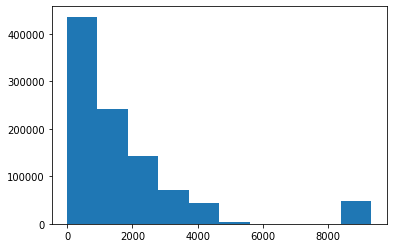

In [ ]:
plt.hist(basedata_rnan0['los'], density=False, bins=10)

In [ ]:
basedata_rnan0[basedata_rnan0['los'] == 9320]

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
8,8,33534,0,113208.000,184458.000,9320.000,113208.000,74600.000,18250.000,2,0.000,0,13610.000,6.000,404.000,0.000,0.000,170837000.000,104773.000,92090.000,25250.000,2,0.000,0,11902.000,5.000,237.000,0.000,0.000,1335296.000,106350.000,38020.000,54130.000,22.000,4438.000,0.000,0.000,9715712.000,JAKARTA SELATAN,05.Central Jabotabek,AREA 2
18,18,738777,0,215892.000,203193.000,9320.000,215892.000,0.000,170000.000,2,0.000,0,82571.000,566.000,31786.000,325.000,1.000,14651357000.000,299344.000,2595.000,204000.000,3,0.000,0,88774.000,437.000,23427.000,325.000,1.000,11176170000.000,194996.000,0.000,62000.000,279.000,16724.000,0.000,0.000,14566210000.000,KAMPAR,02.Sumbagteng,AREA 1
37,37,634777,0,505092.000,946214.000,9320.000,505092.000,413952.000,63250.000,4,0.000,0,54250.000,63.000,145036.000,650.000,2.000,7165806600.000,544167.000,436000.000,15000.000,1,0.000,0,8223.000,6.000,206.000,0.000,0.000,13343237000.000,654847.000,414560.000,65383.000,44.000,46388.000,325.000,1.000,15190076000.000,GRESIK,09.Jatim,AREA 3
51,51,776826,0,362058.000,294982.000,9320.000,362058.000,7921.000,242500.000,5,0.000,0,33182.000,26.000,1518.000,0.000,0.000,24893446000.000,527073.000,11750.000,437020.000,11,0.000,0,61269.000,62.000,5150.000,0.000,1.000,48551313000.000,779838.500,13860.000,15957.000,42.000,3637.000,0.000,0.000,182283550000.000,KOTA BEKASI,06.Eastern Jabotabek,AREA 2
173,173,221995,0,58660.000,61315.000,9320.000,58660.000,2660.000,56000.000,1,0.000,0,0.000,102.000,7134.000,0.000,82.000,15672944000.000,56975.000,0.000,56000.000,1,0.000,0,0.000,90.000,5829.000,975.000,62.000,13297144000.000,56000.000,0.000,0.000,71.000,5541.000,0.000,36.000,12141265000.000,KOTA BANDAR LAMPUNG,03.Sumbagsel,AREA 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999960,999960,762716,1,75966.000,12856.000,9320.000,75966.000,5300.000,62000.000,1,0.000,0,7416.000,4.000,182.000,650.000,2.000,2152526800.000,86865.000,10140.000,0.000,0,0.000,0,2750.000,5.000,500.000,975.000,3.000,2240348200.000,85660.000,5300.000,0.000,13.000,1032.000,0.000,0.000,4460852000.000,WAKATOBI,12.Sulawesi,AREA 4
999962,999962,249900,0,100285.000,114963.000,9320.000,100285.000,0.000,99000.000,2,0.000,0,60000.000,121.000,51527.000,325.000,1.000,1010176000.000,102540.000,0.000,99000.000,2,0.000,0,60000.000,180.000,87869.000,1500.000,1.000,2249975800.000,102081.000,0.000,62001.000,130.000,33644.000,0.000,0.000,773455900.000,KOTA BLITAR,09.Jatim,AREA 3
999985,999985,318889,1,158318.000,95694.000,9320.000,158318.000,660.000,150000.000,2,0.000,0,7658.000,20.000,1460.000,0.000,0.000,22618170000.000,107435.000,30600.000,75000.000,1,0.000,0,1715.000,20.000,1506.000,0.000,0.000,20014551000.000,93700.000,2660.000,0.000,5.000,596.000,325.000,1.000,5806989300.000,JAKARTA TIMUR,05.Central Jabotabek,AREA 2
999992,999992,823383,0,162260.000,159140.000,9320.000,162260.000,1320.000,156500.000,2,0.000,0,67500.000,60.000,25604.000,0.000,0.000,9936301000.000,157940.000,1320.000,156500.000,2,0.000,0,67500.000,93.000,33413.000,0.000,0.000,7543641000.000,150478.000,1320.000,60158.000,72.000,13905.000,0.000,0.000,4635291600.000,JAKARTA PUSAT,05.Central Jabotabek,AREA 2


In [ ]:
basedata_rnan0_ol = basedata_rnan0.drop(basedata_rnan0[basedata_rnan0['los'] == 9320].index)
np.shape(basedata_rnan0_ol)

(940395, 41)

#### Data cleaning berdasarkan asumsi pada use case

In [ ]:
#basedata[(basedata['m0_arpu_all'] == 0 ) & (basedata['mytsel_lapse'] == 1 )] #: null
#basedata[(basedata['m0_arpu_all'] == 0 )] #: null


In [ ]:
#ambil data yg seluruh arpu dls nya positif
#ambil data yg seluruh arpu all nya positif (arpu all negatif hanya ditemukan di m2)
basedata_1 = basedata_rnan0_ol[
                    (basedata_rnan0_ol['m0_arpu_dls'] >= 0 ) & 
                    (basedata_rnan0_ol['m1_arpu_dls'] >= 0 ) & 
                    (basedata_rnan0_ol['m2_arpu_dls'] >= 0 ) &
                    (basedata_rnan0_ol['m2_arpu_all'] >= 0) 
                           ]


basedata_2 = basedata_1.drop(basedata_1[(basedata_1['arpu_30d_after'] == 0 ) & (basedata_1['mytsel_lapse'] == 0 )].index)

basedata_3 = basedata_2.drop(basedata_2[(basedata_2['m0_mytsel_rev'] == 0 ) & (basedata_2['mytsel_lapse'] == 1 )].index)

basedata_4 = basedata_3.drop(basedata_3[(basedata_3['los'] == 0) & 
                                        (((basedata_3['m1_arpu_all']) > 0) | (basedata_3['m2_arpu_all'] > 0))].index)



basedata_clean = basedata_4
basedata_clean

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,0,465005,0,122418.000,198170.000,1088.000,122418.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,0.000,0.000,32827011000.000,109630.000,11120.000,75010.000,2,0.000,0,0.000,11.000,12338.000,1500.000,51.000,38890844000.000,108670.000,9660.000,0.000,8.000,7818.000,0.000,10.000,30603385000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1
1,1,272500,0,76835.000,64167.000,126.000,76835.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,350.000,9.000,3612966000.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,38015.000,0.000,0.000,0.000,0.000,0.000,0.000,9510331000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4
2,2,713785,0,180350.000,67658.000,349.000,180350.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,350.000,1.000,42025378000.000,104992.000,0.000,92000.000,2,0.000,0,12992.000,12.000,4669.000,0.000,0.000,26324451000.000,222351.000,0.000,16336.000,53.000,23465.000,0.000,0.000,25965871000.000,KOTA SERANG,04.Western Jabotabek,AREA 2
3,3,123273,0,342633.000,170983.400,804.000,342633.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,0.000,14.000,55975846000.000,330353.600,4473.600,240010.000,5,10000.000,1,0.000,5.000,202.000,0.000,3.000,91020490000.000,469236.000,12200.000,0.000,13.000,353.000,0.000,28.000,148611600000.000,KERINCI,03.Sumbagsel,AREA 1
4,4,841937,0,191000.000,656710.000,946.000,191000.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,0.000,0.000,93820764000.000,431360.000,0.000,382000.000,2,0.000,0,23200.000,1.000,3478.000,0.000,0.000,104300560000.000,399040.000,0.000,0.000,0.000,0.000,0.000,0.000,97076880000.000,SUMEDANG,07.Jabar,AREA 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999994,107900,1,150001.000,87003.000,115.000,150001.000,4496.000,10.000,1,0.000,0,37764.000,50.000,1352.000,700.000,2.000,14122929000.000,103940.000,35840.000,63000.000,1,0.000,0,0.000,3.000,114.000,350.000,2.000,7338865700.000,1060.000,1060.000,0.000,0.000,0.000,0.000,0.000,0.000,JAKARTA BARAT,05.Central Jabotabek,AREA 2
999995,999995,532251,0,189980.000,28835.000,1207.000,189980.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,375.000,8.000,36685740000.000,125000.000,0.000,125000.000,2,0.000,0,0.000,30.000,7087.000,0.000,0.000,21517844000.000,12936.000,0.000,0.000,25.000,1622.000,0.000,1.000,6480602000.000,MUKOMUKO,03.Sumbagsel,AREA 1
999997,999997,692025,0,137998.000,242494.000,167.000,137998.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,700.000,3.000,13912436000.000,77155.000,3696.000,18800.000,4,0.000,0,27335.000,31.000,22621.000,350.000,1.000,12469672000.000,138853.000,42506.000,4992.000,4.000,767.000,350.000,1.000,9813585000.000,KOTA PEMATANG SIANTAR,01.Sumbagut,AREA 1
999998,999998,499608,0,79970.000,75000.000,1332.000,79970.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,0.000,0.000,15545127000.000,75010.000,0.000,75000.000,1,0.000,0,10.000,2.000,7139.000,0.000,0.000,14028094000.000,75020.000,0.000,20.000,3.000,2119.000,0.000,0.000,5409574000.000,BOYOLALI,08.Jateng,AREA 3


In [ ]:
lapse_count = basedata_4[basedata_4['mytsel_lapse'] ==1].shape[0]
notlapse_count = basedata_4[basedata_4['mytsel_lapse'] ==0].shape[0]
total_sample = lapse_count + notlapse_count
print(lapse_count/notlapse_count)
print(lapse_count/total_sample)


0.40951245263523084
0.29053482420081106


### Mengurangi Korelasi antar Features

#### Cek Correlation Eksisting

In [ ]:
#remove id & categorical data
basedata1 = basedata.drop(['Unnamed: 0','mytsel_lapse','city', 'region', 'area', 'id'], axis = 1)

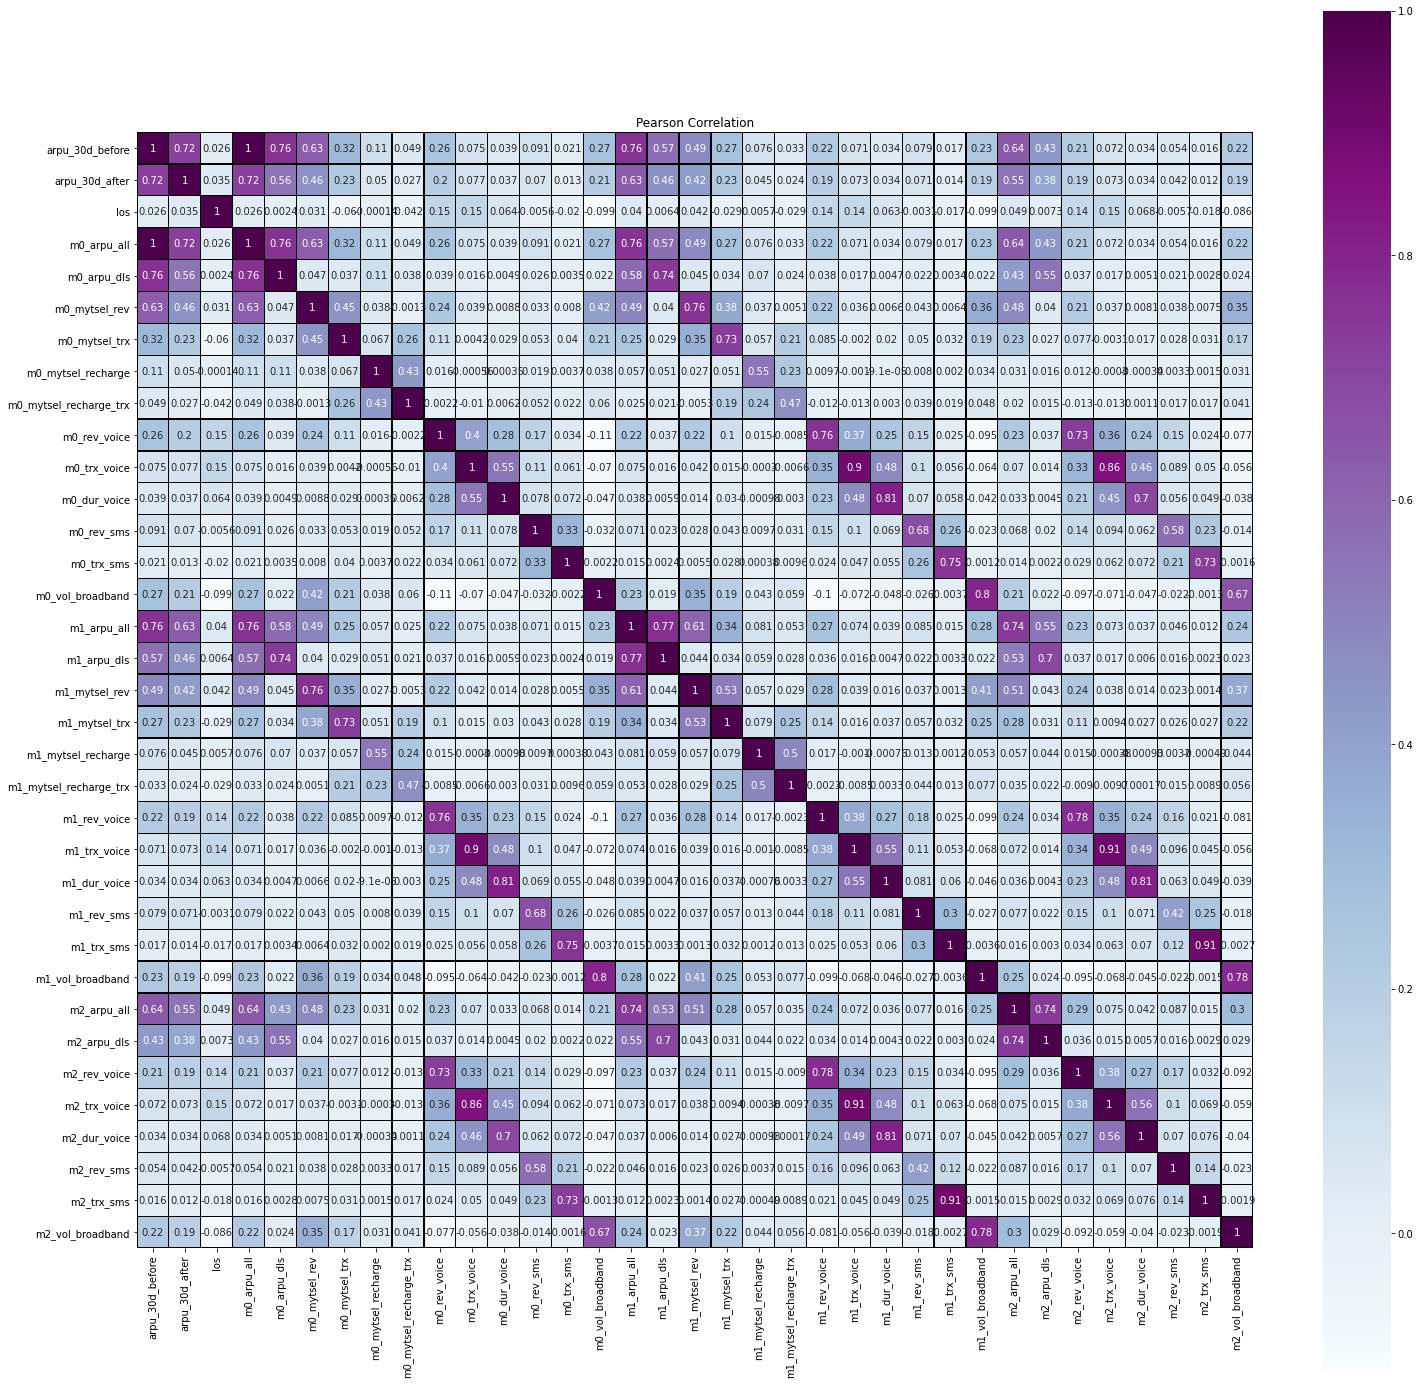

In [ ]:
#Setting Figure
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation')

#Membuat Visualisasi Correlation Pearson
sns.heatmap(basedata1.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)

## DATASET #2
#### Data yang telah dimanipulasi dari data yang telah dibersihkan

In [ ]:
# Cek jumlah mismatch data arpu & revenue
np.shape(
    
basedata_clean[(basedata_clean['m0_rev_voice'] > basedata_clean['m0_arpu_all']) |
              (basedata_clean['m1_rev_voice'] > basedata_clean['m1_arpu_all']) |
              (basedata_clean['m2_rev_voice'] > basedata_clean['m2_arpu_all']) |

              (basedata_clean['m0_rev_sms'] > basedata_clean['m0_arpu_all']) |
              (basedata_clean['m1_rev_sms'] > basedata_clean['m1_arpu_all']) |
              (basedata_clean['m2_rev_sms'] > basedata_clean['m2_arpu_all']) |

              (basedata_clean['m0_mytsel_rev'] > basedata_clean['m0_arpu_all']) |
              (basedata_clean['m1_mytsel_rev'] > basedata_clean['m1_arpu_all']) |

              ((basedata_clean['m0_rev_voice'] + basedata_clean['m0_rev_sms'] ) + basedata_clean['m0_mytsel_rev'] > basedata_clean['m0_arpu_all']) |
              ((basedata_clean['m1_rev_voice'] + basedata_clean['m1_rev_sms'] ) + basedata_clean['m1_mytsel_rev'] > basedata_clean['m1_arpu_all']) |
              ((basedata_clean['m2_rev_voice'] + basedata_clean['m2_rev_sms'] ) > basedata_clean['m2_arpu_all']) 

]
)

(85257, 41)

### Data Manipulation 

In [ ]:
#REMOVE SMS

#basedata_m0 = basedata[['m0_arpu_all',
# 'm0_arpu_dls', 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx', 
# 'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms', 'm0_trx_sms', 'm0_vol_broadband']]

#basedata_m1 =basedata[['m1_arpu_all',
# 'm1_arpu_dls', 'm1_mytsel_rev', 'm1_mytsel_trx', 'm1_mytsel_recharge', 'm1_mytsel_recharge_trx',
# 'm1_rev_voice', 'm1_trx_voice', 'm1_dur_voice', 'm1_rev_sms', 'm1_trx_sms', 'm1_vol_broadband']]

basedata_agg = basedata_clean[[
#'m0_arpu_all', 'm0_rev_sms', 'm0_trx_sms',
 'los',
 'm0_arpu_dls', 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx', 
 'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice',  'm0_vol_broadband', 'city',
 'region','area']]

#

#Data Manipulation menggantikan data m0_arpuall
#basedata_agg.loc[:,'m0arpu-others'] = basedata_clean['m0_arpu_all']-basedata_clean['m0_arpu_dls']-basedata_clean['m0_mytsel_rev']
## Coba ganti perhitungan arpu others
## basedata_agg.loc[:,'m0arpu-others'] = basedata_clean['m0_arpu_all']-basedata_clean['m0_arpu_dls']
##basedata_agg.loc[:,'m0arpu-others1'] =  basedata_clean['m0_arpu_all']-basedata_clean['m0_mytsel_rev']-basedata_clean['m0_rev_sms']-basedata_clean['m0_rev_voice']
basedata_agg.loc[:,'m0_rev-others'] =  basedata_clean['m0_arpu_all']-basedata_clean['m0_arpu_dls']-basedata_clean['m0_mytsel_rev']-basedata_clean['m0_rev_sms']-basedata_clean['m0_rev_voice']

#Data Manipulation menggantikan data m1
##basedata_agg.loc[:,'m1-m0_arpuall'] = basedata['m1_arpu_all']-basedata['m0_arpu_all']
##Data Manipulation menggantikan m1_arpuall/m1-m0arpuall
##basedata_agg.loc[:,'m1-m0_arpu-others'] = basedata_clean['m1_arpu_all']-basedata_clean['m1_arpu_dls']-basedata_clean['m1_mytsel_rev']-basedata_agg['m0arpu-others']
### @ Ganti perhitungan m1-m0_arpu-others
### basedata_agg.loc[:,'m1-m0_arpu-others'] = basedata_clean['m1_arpu_all']-basedata_clean['m1_arpu_dls']-basedata_agg['m0arpu-others']
###basedata_agg.loc[:,'m1-m0_arpu-others1'] = basedata_clean['m1_arpu_all']-basedata_clean['m1_mytsel_rev']-basedata_clean['m1_rev_sms']-basedata_clean['m1_rev_voice']-basedata_agg['m0arpu-others1']
###basedata_agg.loc[:,'m1-m0_arpu-others2'] = basedata_clean['m1_arpu_all']-basedata_clean['m1_arpu_dls']-basedata_clean['m1_mytsel_rev']-basedata_clean['m1_rev_sms']-basedata_clean['m1_rev_voice']-basedata_agg['m0arpu-others2']
basedata_agg.loc[:,'m1_rev-others'] = basedata_clean['m1_arpu_all']-basedata_clean['m1_arpu_dls']-basedata_clean['m1_mytsel_rev']-basedata_clean['m1_rev_sms']-basedata_clean['m1_rev_voice']

basedata_agg.loc[:,'m1-m0_arpudls'] = basedata_clean['m1_arpu_dls']-basedata_clean['m0_arpu_dls']
basedata_agg.loc[:,'m1-m0_mytsel_rev'] = basedata_clean['m1_mytsel_rev']-basedata_clean['m0_mytsel_rev']
basedata_agg.loc[:,'m1-m0_mytsel_trx'] = basedata_clean['m1_mytsel_trx']-basedata_clean['m0_mytsel_trx']
basedata_agg.loc[:,'m1-m0_mytsel_recharge'] = basedata_clean['m1_mytsel_recharge']-basedata_clean['m0_mytsel_recharge']
basedata_agg.loc[:,'m1-m0_mytsel_recharge_trx']  = basedata_clean['m1_mytsel_recharge_trx']-basedata_clean['m0_mytsel_recharge_trx']
basedata_agg.loc[:,'m1-m0_rev_voice'] = basedata_clean['m1_rev_voice']-basedata_clean['m0_rev_voice']
basedata_agg.loc[:,'m1-m0_trx_voice'] = basedata_clean['m1_trx_voice']-basedata_clean['m0_trx_voice']
basedata_agg.loc[:,'m1-m0_dur_voice'] = basedata_clean['m1_dur_voice']-basedata_clean['m0_dur_voice']
#REMOVE SMS
#basedata_agg.loc[:,'m1-m0_rev_sms'] = basedata_clean['m1_rev_sms']-basedata_clean['m0_rev_sms']
#basedata_agg.loc[:,'m1-m0_trx_sms'] = basedata_clean['m1_trx_sms']-basedata_clean['m0_trx_sms']
basedata_agg.loc[:,'m1-m0_vol_broadband'] = basedata_clean['m1_vol_broadband']-basedata_clean['m0_vol_broadband']

#Data Manipulation menggantikan data m2
##Data Manipulation menggantikan m2_arpuall/m2-m1_arpuall
##basedata_agg.loc[:,'m2-m1_arpu-others'] = basedata_clean['m2_arpu_all']-basedata_clean['m2_arpu_dls']-basedata_clean['m1_arpu_all']-basedata_clean['m2_arpu_dls']-basedata_clean['m2_mytsel_rev']
### @ Ganti perhitungan m2-m1_arpu-others
###basedata_agg.loc[:,'m2-m1_arpu-others'] = basedata_clean['m2_arpu_all']-basedata_clean['m2_arpu_dls']-basedata_agg['m1-m0_arpu-others']
###basedata_agg.loc[:,'m2-m1_arpu-others1'] = basedata_clean['m2_arpu_all']-basedata_clean['m2_rev_sms']-basedata_clean['m2_rev_voice']-basedata_clean['m1_arpu_all']-basedata_clean['m1_rev_sms']-basedata_clean['m1_rev_voice']
###basedata_agg.loc[:,'m2-m1_arpu-others2'] = basedata_clean['m2_arpu_all']-basedata_clean['m2_arpu_dls']-basedata_clean['m2_rev_sms']-basedata_clean['m2_rev_voice']-basedata_clean['m1_arpu_all']-basedata_clean['m1_arpu_dls']-basedata_clean['m1_rev_sms']-basedata_clean['m1_rev_voice']
basedata_agg.loc[:,'m2_rev-others'] = basedata_clean['m2_arpu_all']-basedata_clean['m2_arpu_dls']-basedata_clean['m2_rev_sms']-basedata_clean['m2_rev_voice']

#basedata_agg.loc[:,'m2-m1_arpuall'] = basedata['m2_arpu_all']-basedata['m1_arpu_all']
basedata_agg.loc[:,'m2-m1_arpudls'] = basedata_clean['m2_arpu_dls']-basedata_clean['m1_arpu_dls']
basedata_agg.loc[:,'m2-m1_rev_voice'] = basedata_clean['m2_rev_voice']-basedata_clean['m1_rev_voice']
basedata_agg.loc[:,'m2-m1_trx_voice'] = basedata_clean['m2_trx_voice']-basedata_clean['m1_trx_voice']
basedata_agg.loc[:,'m2-m1_dur_voice'] = basedata_clean['m2_dur_voice']-basedata_clean['m1_dur_voice']
#REMOVE SMS
#basedata_agg.loc[:,'m2-m1_rev_sms'] = basedata_clean['m2_rev_sms']-basedata_clean['m1_rev_sms']
#basedata_agg.loc[:,'m2-m1_trx_sms'] = basedata_clean['m2_trx_sms']-basedata_clean['m1_trx_sms']


basedata_agg

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,city,region,area,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice
0,1088.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,32827011000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1,110000.000,22000.000,2780.000,73010.000,1,0.000,0,-2078.000,4.000,11674.000,6063833000.000,99010.000,-1460.000,0.000,-3.000,-4520.000
1,126.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,3612966000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4,0.000,0.000,-3485.000,-73000.000,-1,0.000,0,0.000,-6.000,-280.000,-3612966000.000,38015.000,0.000,0.000,0.000,0.000
2,349.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,42025378000.000,KOTA SERANG,04.Western Jabotabek,AREA 2,0.000,0.000,0.000,-88000.000,-1,-10000.000,-1,12992.000,5.000,340.000,-15700927000.000,206015.000,0.000,3344.000,41.000,18796.000
3,804.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,55975846000.000,KERINCI,03.Sumbagsel,AREA 1,80000.000,85870.000,-98159.400,80010.000,3,10000.000,1,0.000,5.000,202.000,35044644000.000,457036.000,7726.400,0.000,8.000,151.000
4,946.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,93820764000.000,SUMEDANG,07.Jabar,AREA 2,0.000,26160.000,0.000,191000.000,1,0.000,0,23200.000,1.000,3478.000,10479796000.000,399040.000,0.000,-23200.000,-1.000,-3478.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,115.000,4496.000,10.000,1,0.000,0,37764.000,50.000,1352.000,14122929000.000,JAKARTA BARAT,05.Central Jabotabek,AREA 2,107031.000,4750.000,31344.000,62990.000,0,0.000,0,-37764.000,-47.000,-1238.000,-6784063300.000,0.000,-34780.000,0.000,-3.000,-114.000
999995,1207.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,36685740000.000,MUKOMUKO,03.Sumbagsel,AREA 1,180000.000,0.000,-1385.000,116780.000,-2,0.000,0,0.000,-224.000,-7997.000,-15167896000.000,12936.000,0.000,0.000,-5.000,-5465.000
999997,167.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,13912436000.000,KOTA PEMATANG SIANTAR,01.Sumbagut,AREA 1,83319.000,26974.000,-40264.000,14100.000,3,-10000.000,-1,22016.000,24.000,20919.000,-1442764000.000,91005.000,38810.000,-22343.000,-27.000,-21854.000
999998,1332.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,15545127000.000,BOYOLALI,08.Jateng,AREA 3,4970.000,0.000,0.000,0.000,0,0.000,0,10.000,1.000,7112.000,-1517033000.000,75000.000,0.000,10.000,1.000,-5020.000


### Cek Correlation dari data yang dimanipulate 

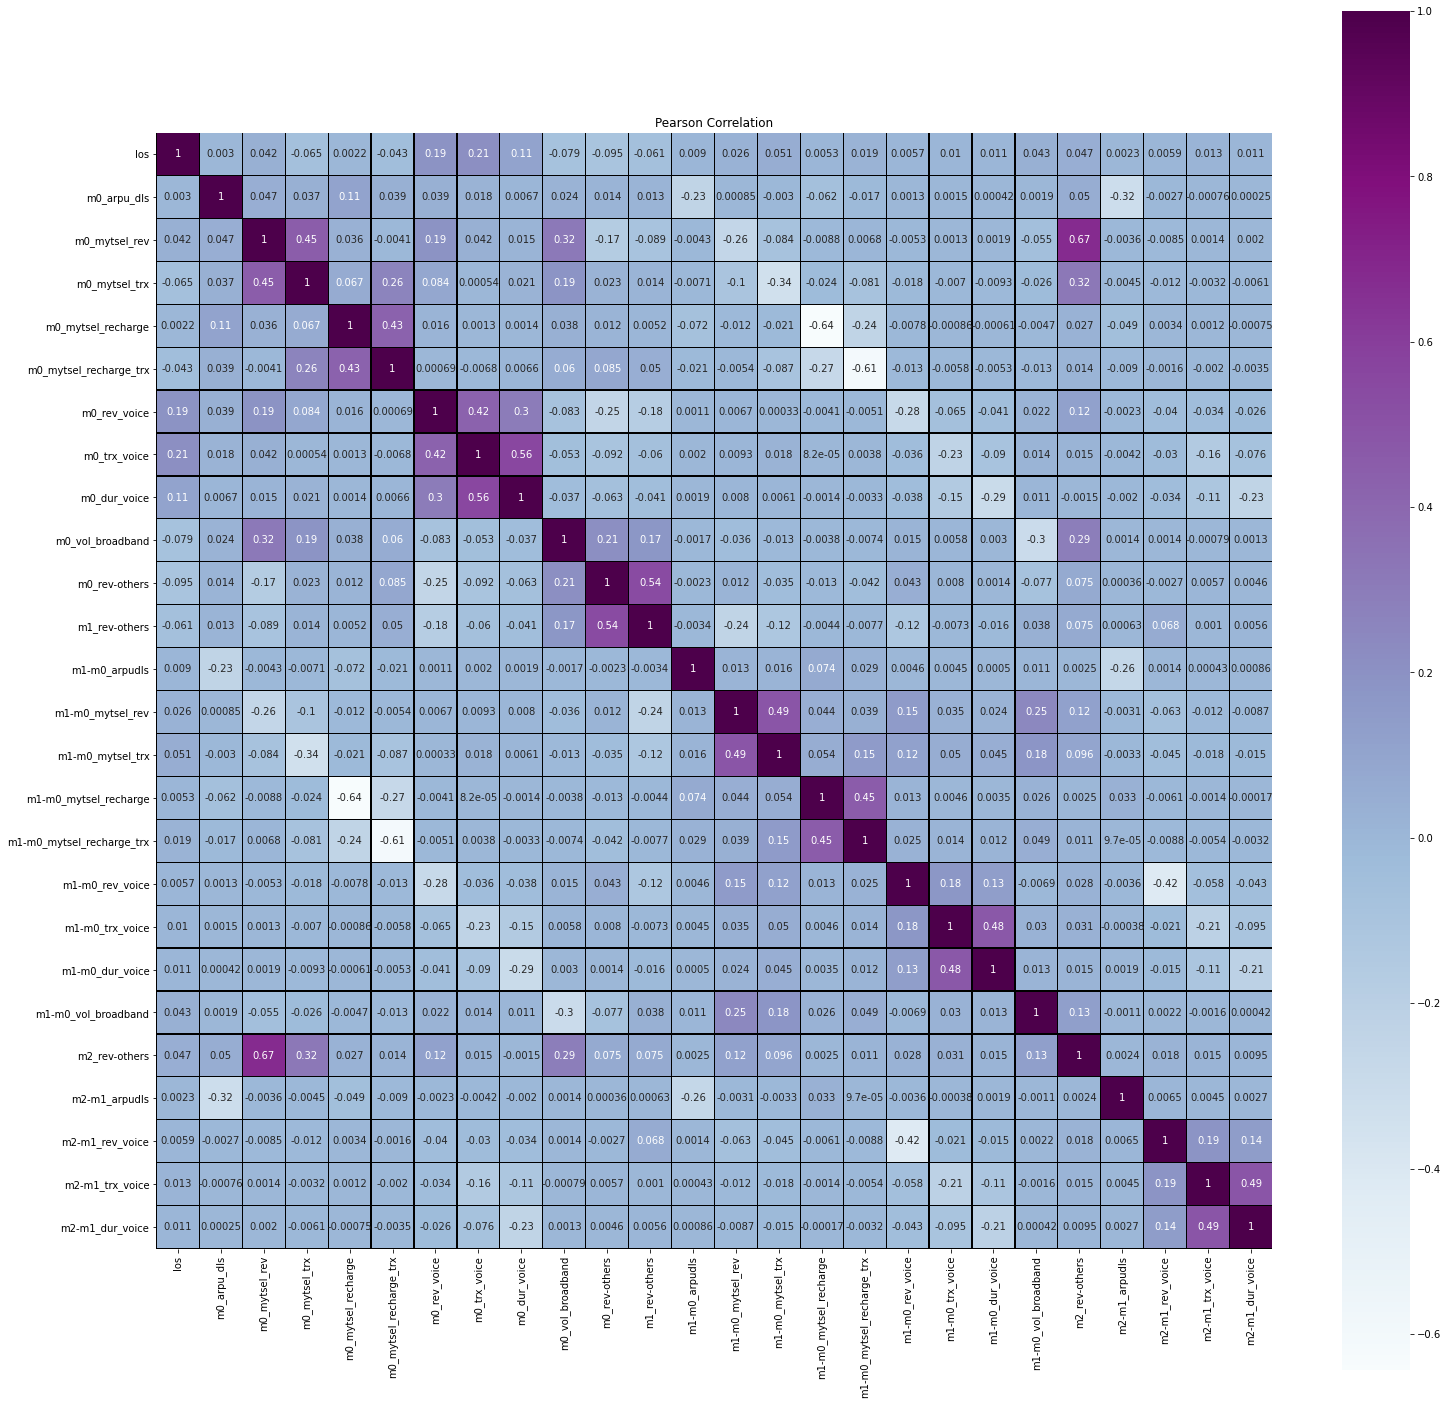

In [ ]:
#Setting Figure
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation')

#exclude area region
basedata_num = basedata_agg.drop(columns=['city','region', 'area'])

#Membuat Visualisasi Correlation Pearson
sns.heatmap(basedata_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)

## DATASET #3


### Category Manipulation

In [ ]:
basedata_agg_city = basedata_agg
basedata_agg_city.loc[:,'Unnamed: 0'] = basedata_clean['Unnamed: 0']
basedata_agg_city.loc[:,'mytsel_lapse'] = basedata_clean['mytsel_lapse']


#Tambah kolom dengan jumlah mytsel_lapse == 1 per city
basedata_agg_city.loc[:,'cat_city'] = basedata_agg_city.groupby(["city"])["mytsel_lapse"].transform("sum")

#Tambah kolom dengan jumlah pelanggan per city
basedata_agg_city.loc[:,'per_city'] = basedata_agg_city.groupby(["city"])["Unnamed: 0"].transform("count")

basedata_agg_city.groupby(by =['mytsel_lapse','city']).size().reset_index(name='counts')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,mytsel_lapse,city,counts
0,0,ACEH BARAT,507
1,0,ACEH BARAT DAYA,211
2,0,ACEH BESAR,1173
3,0,ACEH JAYA,183
4,0,ACEH SELATAN,369
...,...,...,...
1028,1,WAROPEN,16
1029,1,WAY KANAN,371
1030,1,WONOGIRI,870
1031,1,WONOSOBO,399


In [ ]:
basedata_agg_city.loc[:,'proporsi_lapse_city'] = basedata_agg_city['cat_city'] / basedata_agg_city['per_city']
basedata_agg_city.head()
#kategori[kategori['mytsel_lapse']==1].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,city,region,area,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice,Unnamed: 0,mytsel_lapse,cat_city,per_city,proporsi_lapse_city
0,1088.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,32827011000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1,110000.000,22000.000,2780.000,73010.000,1,0.000,0,-2078.000,4.000,11674.000,6063833000.000,99010.000,-1460.000,0.000,-3.000,-4520.000,0,0,595,1561,0.381
1,126.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,3612966000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4,0.000,0.000,-3485.000,-73000.000,-1,0.000,0,0.000,-6.000,-280.000,-3612966000.000,38015.000,0.000,0.000,0.000,0.000,1,0,3163,10112,0.313
2,349.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,42025378000.000,KOTA SERANG,04.Western Jabotabek,AREA 2,0.000,0.000,0.000,-88000.000,-1,-10000.000,-1,12992.000,5.000,340.000,-15700927000.000,206015.000,0.000,3344.000,41.000,18796.000,2,0,4703,7699,0.611
3,804.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,55975846000.000,KERINCI,03.Sumbagsel,AREA 1,80000.000,85870.000,-98159.400,80010.000,3,10000.000,1,0.000,5.000,202.000,35044644000.000,457036.000,7726.400,0.000,8.000,151.000,3,0,444,1049,0.423
4,946.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,93820764000.000,SUMEDANG,07.Jabar,AREA 2,0.000,26160.000,0.000,191000.000,1,0.000,0,23200.000,1.000,3478.000,10479796000.000,399040.000,0.000,-23200.000,-1.000,-3478.000,4,0,1005,3313,0.303


### Cek Correlation dari manipulated category

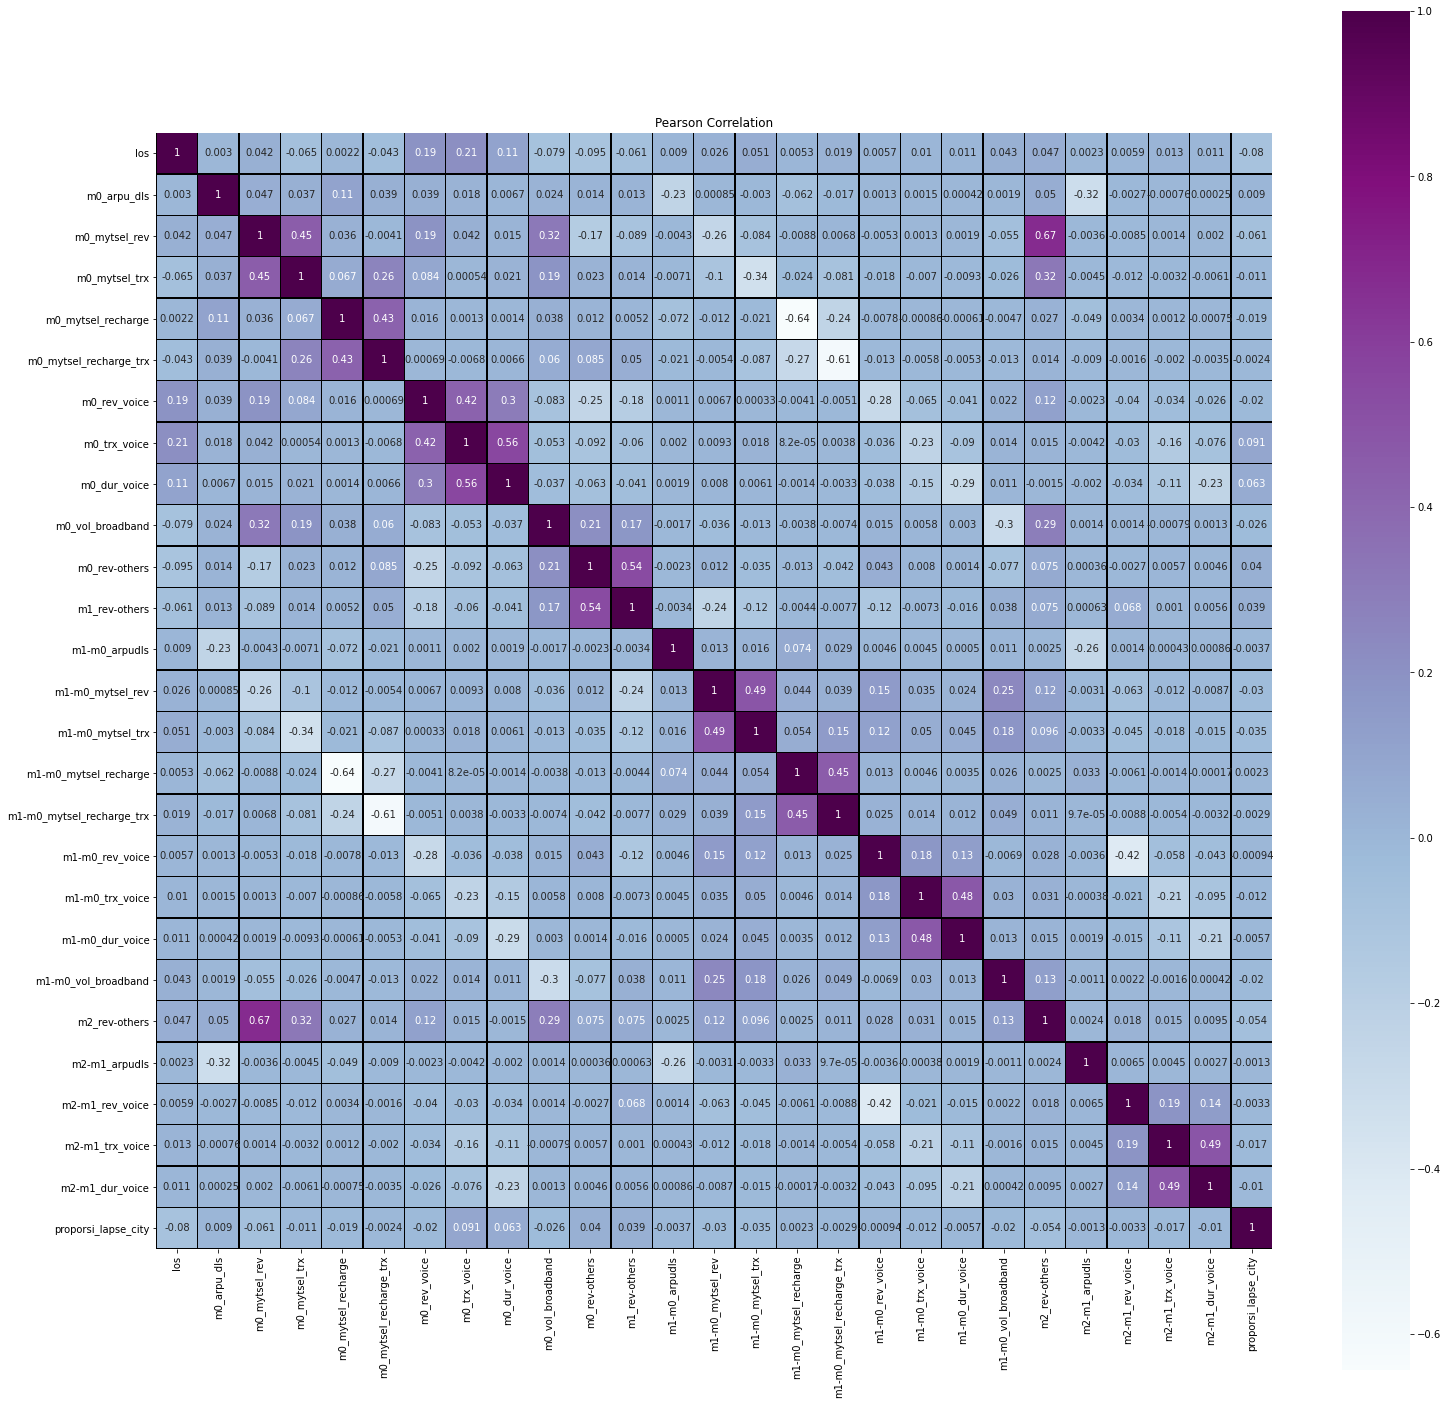

In [ ]:
#Setting Figure
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation')

#exclude area region
basedata_city_num = basedata_agg_city.drop(columns=['city','region', 'area', 'Unnamed: 0', 'mytsel_lapse', 'cat_city', 'per_city'])

#Membuat Visualisasi Correlation Pearson
sns.heatmap(basedata_city_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)

#### Proporsi Lapse

In [ ]:
print(basedata_agg_city['mytsel_lapse'].value_counts())
print(basedata_agg_city[basedata_agg_city['mytsel_lapse']==1].shape[0] /
      basedata_agg_city['mytsel_lapse'].shape[0]
      )

0    665843
1    272671
Name: mytsel_lapse, dtype: int64
0.29053482420081106


## DATASET #4: Data Manipulation Initial Data

### Data Manipulation: Aggregate

In [ ]:
basedata_clean_all_0 = basedata

In [ ]:
#drop los with NaN value
#basedata_all_rnan = basedata_dupr.dropna(subset=['los']) 

#drop city with NaN
#basedata_rnancity = basedata_rnan.dropna(subset=['city']) 

#replace NaN with 0
basedata_all_rnan0 = basedata_clean_all_0.fillna(0)
basedata_all_rnan0

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,0,465005,0,122418.000,198170.000,1088.000,122418.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,0.000,0.000,32827011000.000,109630.000,11120.000,75010.000,2,0.000,0,0.000,11.000,12338.000,1500.000,51.000,38890844000.000,108670.000,9660.000,0.000,8.000,7818.000,0.000,10.000,30603385000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1
1,1,272500,0,76835.000,64167.000,126.000,76835.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,350.000,9.000,3612966000.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,38015.000,0.000,0.000,0.000,0.000,0.000,0.000,9510331000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4
2,2,713785,0,180350.000,67658.000,349.000,180350.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,350.000,1.000,42025378000.000,104992.000,0.000,92000.000,2,0.000,0,12992.000,12.000,4669.000,0.000,0.000,26324451000.000,222351.000,0.000,16336.000,53.000,23465.000,0.000,0.000,25965871000.000,KOTA SERANG,04.Western Jabotabek,AREA 2
3,3,123273,0,342633.000,170983.400,804.000,342633.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,0.000,14.000,55975846000.000,330353.600,4473.600,240010.000,5,10000.000,1,0.000,5.000,202.000,0.000,3.000,91020490000.000,469236.000,12200.000,0.000,13.000,353.000,0.000,28.000,148611600000.000,KERINCI,03.Sumbagsel,AREA 1
4,4,841937,0,191000.000,656710.000,946.000,191000.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,0.000,0.000,93820764000.000,431360.000,0.000,382000.000,2,0.000,0,23200.000,1.000,3478.000,0.000,0.000,104300560000.000,399040.000,0.000,0.000,0.000,0.000,0.000,0.000,97076880000.000,SUMEDANG,07.Jabar,AREA 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,532251,0,189980.000,28835.000,1207.000,189980.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,375.000,8.000,36685740000.000,125000.000,0.000,125000.000,2,0.000,0,0.000,30.000,7087.000,0.000,0.000,21517844000.000,12936.000,0.000,0.000,25.000,1622.000,0.000,1.000,6480602000.000,MUKOMUKO,03.Sumbagsel,AREA 1
999996,999996,160288,0,86260.000,26292.000,9320.000,86260.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,0.000,0.000,1006717950.000,11496.000,0.000,5500.000,2,0.000,0,6576.000,6.000,1452.000,0.000,0.000,3427328.000,14601.000,0.000,0.000,0.000,0.000,0.000,0.000,15474688.000,KOTA SAMARINDA,11.Kalimantan,AREA 4
999997,999997,692025,0,137998.000,242494.000,167.000,137998.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,700.000,3.000,13912436000.000,77155.000,3696.000,18800.000,4,0.000,0,27335.000,31.000,22621.000,350.000,1.000,12469672000.000,138853.000,42506.000,4992.000,4.000,767.000,350.000,1.000,9813585000.000,KOTA PEMATANG SIANTAR,01.Sumbagut,AREA 1
999998,999998,499608,0,79970.000,75000.000,1332.000,79970.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,0.000,0.000,15545127000.000,75010.000,0.000,75000.000,1,0.000,0,10.000,2.000,7139.000,0.000,0.000,14028094000.000,75020.000,0.000,20.000,3.000,2119.000,0.000,0.000,5409574000.000,BOYOLALI,08.Jateng,AREA 3


In [ ]:
basedata_clean_all = basedata_all_rnan0

In [ ]:
#REMOVE SMS

#basedata_m0 = basedata[['m0_arpu_all',
# 'm0_arpu_dls', 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx', 
# 'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms', 'm0_trx_sms', 'm0_vol_broadband']]

#basedata_m1 =basedata[['m1_arpu_all',
# 'm1_arpu_dls', 'm1_mytsel_rev', 'm1_mytsel_trx', 'm1_mytsel_recharge', 'm1_mytsel_recharge_trx',
# 'm1_rev_voice', 'm1_trx_voice', 'm1_dur_voice', 'm1_rev_sms', 'm1_trx_sms', 'm1_vol_broadband']]

basedata_agg_all = basedata_clean_all[[
#'m0_arpu_all', 'm0_rev_sms', 'm0_trx_sms',
 'los',
 'm0_arpu_dls', 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx', 
 'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice',  'm0_vol_broadband', 'city',
 'region','area']]

#

#Data Manipulation menggantikan data m0_arpuall
basedata_agg_all.loc[:,'m0_rev-others'] =  basedata_clean_all['m0_arpu_all']-basedata_clean_all['m0_arpu_dls']-basedata_clean_all['m0_mytsel_rev']-basedata_clean_all['m0_rev_sms']-basedata_clean_all['m0_rev_voice']

#Data Manipulation menggantikan data m1
basedata_agg_all.loc[:,'m1_rev-others'] = basedata_clean_all['m1_arpu_all']-basedata_clean_all['m1_arpu_dls']-basedata_clean_all['m1_mytsel_rev']-basedata_clean_all['m1_rev_sms']-basedata_clean_all['m1_rev_voice']

basedata_agg_all.loc[:,'m1-m0_arpudls'] = basedata_clean_all['m1_arpu_dls']-basedata_clean_all['m0_arpu_dls']
basedata_agg_all.loc[:,'m1-m0_mytsel_rev'] = basedata_clean_all['m1_mytsel_rev']-basedata_clean_all['m0_mytsel_rev']
basedata_agg_all.loc[:,'m1-m0_mytsel_trx'] = basedata_clean_all['m1_mytsel_trx']-basedata_clean_all['m0_mytsel_trx']
basedata_agg_all.loc[:,'m1-m0_mytsel_recharge'] = basedata_clean_all['m1_mytsel_recharge']-basedata_clean_all['m0_mytsel_recharge']
basedata_agg_all.loc[:,'m1-m0_mytsel_recharge_trx']  = basedata_clean_all['m1_mytsel_recharge_trx']-basedata_clean_all['m0_mytsel_recharge_trx']
basedata_agg_all.loc[:,'m1-m0_rev_voice'] = basedata_clean_all['m1_rev_voice']-basedata_clean_all['m0_rev_voice']
basedata_agg_all.loc[:,'m1-m0_trx_voice'] = basedata_clean_all['m1_trx_voice']-basedata_clean_all['m0_trx_voice']
basedata_agg_all.loc[:,'m1-m0_dur_voice'] = basedata_clean_all['m1_dur_voice']-basedata_clean_all['m0_dur_voice']
#REMOVE SMS
#basedata_agg.loc[:,'m1-m0_rev_sms'] = basedata_clean['m1_rev_sms']-basedata_clean['m0_rev_sms']
#basedata_agg.loc[:,'m1-m0_trx_sms'] = basedata_clean['m1_trx_sms']-basedata_clean['m0_trx_sms']
basedata_agg_all.loc[:,'m1-m0_vol_broadband'] = basedata_clean_all['m1_vol_broadband']-basedata_clean_all['m0_vol_broadband']

#Data Manipulation menggantikan data m2

basedata_agg_all.loc[:,'m2_rev-others'] = basedata_clean_all['m2_arpu_all']-basedata_clean_all['m2_arpu_dls']-basedata_clean_all['m2_rev_sms']-basedata_clean_all['m2_rev_voice']

#basedata_agg.loc[:,'m2-m1_arpuall'] = basedata['m2_arpu_all']-basedata['m1_arpu_all']
basedata_agg_all.loc[:,'m2-m1_arpudls'] = basedata_clean_all['m2_arpu_dls']-basedata_clean_all['m1_arpu_dls']
basedata_agg_all.loc[:,'m2-m1_rev_voice'] = basedata_clean_all['m2_rev_voice']-basedata_clean_all['m1_rev_voice']
basedata_agg_all.loc[:,'m2-m1_trx_voice'] = basedata_clean_all['m2_trx_voice']-basedata_clean_all['m1_trx_voice']
basedata_agg_all.loc[:,'m2-m1_dur_voice'] = basedata_clean_all['m2_dur_voice']-basedata_clean_all['m1_dur_voice']
#REMOVE SMS
#basedata_agg.loc[:,'m2-m1_rev_sms'] = basedata_clean['m2_rev_sms']-basedata_clean['m1_rev_sms']
#basedata_agg.loc[:,'m2-m1_trx_sms'] = basedata_clean['m2_trx_sms']-basedata_clean['m1_trx_sms']


basedata_agg_all

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,city,region,area,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice
0,1088.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,32827011000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1,110000.000,22000.000,2780.000,73010.000,1,0.000,0,-2078.000,4.000,11674.000,6063833000.000,99010.000,-1460.000,0.000,-3.000,-4520.000
1,126.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,3612966000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4,0.000,0.000,-3485.000,-73000.000,-1,0.000,0,0.000,-6.000,-280.000,-3612966000.000,38015.000,0.000,0.000,0.000,0.000
2,349.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,42025378000.000,KOTA SERANG,04.Western Jabotabek,AREA 2,0.000,0.000,0.000,-88000.000,-1,-10000.000,-1,12992.000,5.000,340.000,-15700927000.000,206015.000,0.000,3344.000,41.000,18796.000
3,804.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,55975846000.000,KERINCI,03.Sumbagsel,AREA 1,80000.000,85870.000,-98159.400,80010.000,3,10000.000,1,0.000,5.000,202.000,35044644000.000,457036.000,7726.400,0.000,8.000,151.000
4,946.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,93820764000.000,SUMEDANG,07.Jabar,AREA 2,0.000,26160.000,0.000,191000.000,1,0.000,0,23200.000,1.000,3478.000,10479796000.000,399040.000,0.000,-23200.000,-1.000,-3478.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1207.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,36685740000.000,MUKOMUKO,03.Sumbagsel,AREA 1,180000.000,0.000,-1385.000,116780.000,-2,0.000,0,0.000,-224.000,-7997.000,-15167896000.000,12936.000,0.000,0.000,-5.000,-5465.000
999996,9320.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,1006717950.000,KOTA SAMARINDA,11.Kalimantan,AREA 4,75260.000,-580.000,0.000,0.000,0,0.000,0,1076.000,3.000,1422.000,-1003290622.000,14601.000,0.000,-6576.000,-6.000,-1452.000
999997,167.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,13912436000.000,KOTA PEMATANG SIANTAR,01.Sumbagut,AREA 1,83319.000,26974.000,-40264.000,14100.000,3,-10000.000,-1,22016.000,24.000,20919.000,-1442764000.000,91005.000,38810.000,-22343.000,-27.000,-21854.000
999998,1332.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,15545127000.000,BOYOLALI,08.Jateng,AREA 3,4970.000,0.000,0.000,0.000,0,0.000,0,10.000,1.000,7112.000,-1517033000.000,75000.000,0.000,10.000,1.000,-5020.000


### Data Manipulation Category City 

In [ ]:
basedata_agg_all_city = basedata_agg_all
basedata_agg_all_city.loc[:,'Unnamed: 0'] = basedata_clean_all['Unnamed: 0']
basedata_agg_all_city.loc[:,'mytsel_lapse'] = basedata_clean_all['mytsel_lapse']


#Tambah kolom dengan jumlah mytsel_lapse == 1 per city
basedata_agg_all_city.loc[:,'cat_city'] = basedata_agg_all_city.groupby(["city"])["mytsel_lapse"].transform("sum")

#Tambah kolom dengan jumlah pelanggan per city
basedata_agg_all_city.loc[:,'per_city'] = basedata_agg_all_city.groupby(["city"])["Unnamed: 0"].transform("count")

#Hitung Proporsi lapse city
basedata_agg_all_city.loc[:,'proporsi_lapse_city'] = basedata_agg_all_city['cat_city'] / basedata_agg_all_city['per_city']

basedata_agg_all_city.groupby(by =['mytsel_lapse','city']).size().reset_index(name='counts')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,mytsel_lapse,city,counts
0,0,0,74
1,0,ACEH BARAT,559
2,0,ACEH BARAT DAYA,232
3,0,ACEH BESAR,1324
4,0,ACEH JAYA,200
...,...,...,...
1030,1,WAROPEN,16
1031,1,WAY KANAN,376
1032,1,WONOGIRI,907
1033,1,WONOSOBO,414


In [ ]:
basedata_agg_all_city.head()

,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,city,region,area,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice,Unnamed: 0,mytsel_lapse,cat_city,per_city,proporsi_lapse_city
0,1088.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,32827011000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1,110000.000,22000.000,2780.000,73010.000,1,0.000,0,-2078.000,4.000,11674.000,6063833000.000,99010.000,-1460.000,0.000,-3.000,-4520.000,0,0,629,1678,0.375
1,126.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,3612966000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4,0.000,0.000,-3485.000,-73000.000,-1,0.000,0,0.000,-6.000,-280.000,-3612966000.000,38015.000,0.000,0.000,0.000,0.000,1,0,3472,11435,0.304
2,349.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,42025378000.000,KOTA SERANG,04.Western Jabotabek,AREA 2,0.000,0.000,0.000,-88000.000,-1,-10000.000,-1,12992.000,5.000,340.000,-15700927000.000,206015.000,0.000,3344.000,41.000,18796.000,2,0,4792,7902,0.606
3,804.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,55975846000.000,KERINCI,03.Sumbagsel,AREA 1,80000.000,85870.000,-98159.400,80010.000,3,10000.000,1,0.000,5.000,202.000,35044644000.000,457036.000,7726.400,0.000,8.000,151.000,3,0,820,1548,0.530
4,946.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,93820764000.000,SUMEDANG,07.Jabar,AREA 2,0.000,26160.000,0.000,191000.000,1,0.000,0,23200.000,1.000,3478.000,10479796000.000,399040.000,0.000,-23200.000,-1.000,-3478.000,4,0,1041,3457,0.301


In [ ]:
#exclude area region
basedata_all_city_num = basedata_agg_all_city.drop(columns=['city','region', 'area', 'Unnamed: 0', 'mytsel_lapse', 'cat_city', 'per_city'])

#lapse
basedata_all_lapse = basedata_clean_all['mytsel_lapse']
basedata_all_city_num

,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice,proporsi_lapse_city
0,1088.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,32827011000.000,110000.000,22000.000,2780.000,73010.000,1,0.000,0,-2078.000,4.000,11674.000,6063833000.000,99010.000,-1460.000,0.000,-3.000,-4520.000,0.375
1,126.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,3612966000.000,0.000,0.000,-3485.000,-73000.000,-1,0.000,0,0.000,-6.000,-280.000,-3612966000.000,38015.000,0.000,0.000,0.000,0.000,0.304
2,349.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,42025378000.000,0.000,0.000,0.000,-88000.000,-1,-10000.000,-1,12992.000,5.000,340.000,-15700927000.000,206015.000,0.000,3344.000,41.000,18796.000,0.606
3,804.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,55975846000.000,80000.000,85870.000,-98159.400,80010.000,3,10000.000,1,0.000,5.000,202.000,35044644000.000,457036.000,7726.400,0.000,8.000,151.000,0.530
4,946.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,93820764000.000,0.000,26160.000,0.000,191000.000,1,0.000,0,23200.000,1.000,3478.000,10479796000.000,399040.000,0.000,-23200.000,-1.000,-3478.000,0.301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1207.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,36685740000.000,180000.000,0.000,-1385.000,116780.000,-2,0.000,0,0.000,-224.000,-7997.000,-15167896000.000,12936.000,0.000,0.000,-5.000,-5465.000,0.361
999996,9320.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,1006717950.000,75260.000,-580.000,0.000,0.000,0,0.000,0,1076.000,3.000,1422.000,-1003290622.000,14601.000,0.000,-6576.000,-6.000,-1452.000,0.395
999997,167.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,13912436000.000,83319.000,26974.000,-40264.000,14100.000,3,-10000.000,-1,22016.000,24.000,20919.000,-1442764000.000,91005.000,38810.000,-22343.000,-27.000,-21854.000,0.280
999998,1332.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,15545127000.000,4970.000,0.000,0.000,0.000,0,0.000,0,10.000,1.000,7112.000,-1517033000.000,75000.000,0.000,10.000,1.000,-5020.000,0.303


In [ ]:
basedata_all_city_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   los                        1000000 non-null  float64
 1   m0_arpu_dls                1000000 non-null  float64
 2   m0_mytsel_rev              1000000 non-null  float64
 3   m0_mytsel_trx              1000000 non-null  int64  
 4   m0_mytsel_recharge         1000000 non-null  float64
 5   m0_mytsel_recharge_trx     1000000 non-null  int64  
 6   m0_rev_voice               1000000 non-null  float64
 7   m0_trx_voice               1000000 non-null  float64
 8   m0_dur_voice               1000000 non-null  float64
 9   m0_vol_broadband           1000000 non-null  float64
 10  m0_rev-others              1000000 non-null  float64
 11  m1_rev-others              1000000 non-null  float64
 12  m1-m0_arpudls              1000000 non-null  float64
 13  m1-m0_mytsel_

# MODEL

## CLASSIFICATIO & SPLIT DATA

In [ ]:
#import library
import sklearn as sk
from sklearn.model_selection import train_test_split
#pip3 install xgboost
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# split data into train and valid
X_train, X_test, y_train, y_test = train_test_split(basedata_city_num,basedata_4['mytsel_lapse'], test_size=0.2,random_state=42)

## Optimize Model

In [ ]:
#import library
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
features=list(basedata_city_num.columns)

### SMOTE

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy = 1.0)
X_train_upsamp, y_train_upsamp = sm.fit_sample(X_train, y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)

y_train_upsamp = pd.Series(y_train_upsamp)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(np.shape(X_train_upsamp))
print(np.shape(y_train_upsamp))
print(np.shape(y_train_upsamp[y_train_upsamp == 1]))
print(np.shape(y_train_upsamp[y_train_upsamp == 0]))

(1064698, 27)
(1064698,)
(532349,)
(532349,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN

### Undersampling

In [ ]:
minority_class_len = len(basedata_4[basedata_4['mytsel_lapse'] == 1])
print(minority_class_len)

272671


In [ ]:
majority_class_indices = basedata_4[basedata_4['mytsel_lapse'] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      6,     10,     11,
                12,     13,
            ...
            999984, 999986, 999987, 999988, 999990, 999991, 999995, 999997,
            999998, 999999],
           dtype='int64', length=665843)


In [ ]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           size = minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))
type(minority_class_len)

272671


int

In [ ]:
minority_class_indices = basedata_4[basedata_4['mytsel_lapse'] == 1].index
print(minority_class_indices)

Int64Index([     5,      7,      9,     21,     22,     24,     26,     29,
                35,     41,
            ...
            999970, 999971, 999973, 999975, 999977, 999978, 999980, 999989,
            999993, 999994],
           dtype='int64', length=272671)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample_y = basedata_4.loc[under_sample_indices]
np.shape(under_sample_y)

(545342, 41)

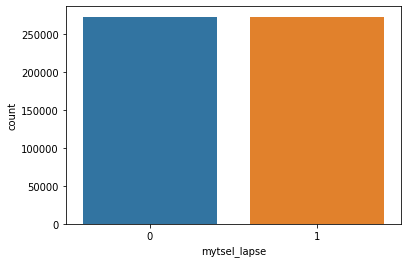

In [ ]:
sns.countplot(x='mytsel_lapse', data=under_sample_y)

In [ ]:
under_sample_x = basedata_city_num.loc[under_sample_indices]
np.shape(under_sample_x)
under_sample_x

,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice,proporsi_lapse_city
5,1503.000,0.000,39000.000,1,20000.000,2,30291.000,20.000,4897.000,10296908000.000,10717.000,0.000,0.000,-39000.000,-1,-20000.000,-2,23721.000,19.000,2208.000,-2857305300.000,42186.000,0.000,-12780.000,-9.000,1586.000,0.286
7,1916.000,11000.000,94250.000,5,0.000,0,16259.000,9.000,1042.000,7157588000.000,-7250.000,0.000,-11000.000,-55250.000,-4,0.000,0,-16259.000,-9.000,-1042.000,-4278078500.000,39000.000,9196.000,0.000,0.000,0.000,0.286
9,31.000,0.000,5000.000,1,0.000,0,0.000,0.000,0.000,21686862000.000,58001.000,28000.000,0.000,-5000.000,-1,0.000,0,0.000,0.000,0.000,-21686862000.000,0.000,0.000,0.000,0.000,0.000,0.303
21,823.000,0.000,96000.000,1,0.000,0,12431.000,5.000,613.000,11879010000.000,16772.000,180.000,0.000,10.000,1,0.000,0,12016.000,9.000,407.000,-665222000.000,96000.000,0.000,-20847.000,-12.000,-934.000,0.210
22,234.000,0.000,30000.000,1,0.000,0,0.000,3.000,610.000,8368217000.000,0.000,0.000,0.000,-30000.000,-1,0.000,0,0.000,-3.000,-610.000,-8328748970.000,0.000,0.000,0.000,0.000,0.000,0.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645963,508.000,100.000,54000.000,1,0.000,0,10217.000,10.000,229.000,80715920000.000,79456.000,20001.000,-100.000,162000.000,3,0.000,0,-10217.000,-10.000,-229.000,6962925000.000,399875.000,0.000,0.000,0.000,0.000,0.320
249498,671.000,37100.000,102000.000,1,0.000,0,0.000,0.000,0.000,26020930000.000,0.000,0.000,-11864.000,204000.000,2,0.000,0,4928.000,4.000,290.000,10275495000.000,100001.000,81267.000,-3445.000,-1.000,-243.000,0.217
230005,794.000,11000.000,345000.000,3,0.000,0,0.000,3.000,131.000,58160062000.000,0.000,0.000,-11000.000,-115000.000,-1,0.000,0,2369.000,4.000,1132.000,-11619348000.000,115000.000,11000.000,-1701.000,-5.000,-1166.000,0.227
784270,35.000,0.000,37000.000,1,200000.000,1,2098.000,2.000,47.000,7787520.000,0.000,166000.000,49000.000,-37000.000,-1,-200000.000,-1,-2098.000,-2.000,-47.000,-2790400.000,0.000,-49000.000,0.000,0.000,0.000,0.205


In [ ]:
Y = under_sample_y.loc[:, basedata_4.columns=='mytsel_lapse']
np.shape(Y)

(545342, 1)

#### XGboost

In [ ]:
X = under_sample_x
Y = under_sample_y.loc[:, basedata_4.columns=='mytsel_lapse']
X_train_unsam, X_test_unsam, y_train_unsam, y_test_unsam = train_test_split(X, Y, test_size=0.2, random_state=42)
print(np.shape(X_train_unsam))
print(np.shape(X_test_unsam))
print(np.shape(y_train_unsam))
print(np.shape(y_test_unsam))


(436273, 27)
(109069, 27)
(436273, 1)
(109069, 1)


In [ ]:
# Train an xgboost model
eval_set3 = [(X_train_unsam, y_train_unsam), (X_test_unsam, y_test_unsam)]
model3 = xgb.XGBClassifier(learning_rate = 0.1,\
                          max_depth = 7,\
                          min_child_weight = 5,\
                          objective = 'binary:logistic',\
                          seed = 42,\
                          gamma = 0.1,\
                          silent = True)
model3.fit(X_train_unsam, y_train_unsam, eval_set=eval_set3,\
          eval_metric="auc", verbose=True, early_stopping_rounds=30)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.778233	validation_1-auc:0.776249
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.782461	validation_1-auc:0.780713
[2]	validation_0-auc:0.78449	validation_1-auc:0.782563
[3]	validation_0-auc:0.78568	validation_1-auc:0.783783
[4]	validation_0-auc:0.786602	validation_1-auc:0.784455
[5]	validation_0-auc:0.787564	validation_1-auc:0.785322
[6]	validation_0-auc:0.78857	validation_1-auc:0.786178
[7]	validation_0-auc:0.789187	validation_1-auc:0.78662
[8]	validation_0-auc:0.789965	validation_1-auc:0.787359
[9]	validation_0-auc:0.790537	validation_1-auc:0.787888
[10]	validation_0-auc:0.791233	validation_1-auc:0.788354
[11]	validation_0-auc:0.791941	validation_1-auc:0.788872
[12]	validation_0-auc:0.792521	validation_1-auc:0.789311
[13]	validation_0-auc:0.793149	validation_1-auc:0.789766
[14]	validation_0-auc:0.793556	validation_1-auc:0.790115
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=True, subsample=1, verbosity=1)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(basedata_city_num,basedata_4['mytsel_lapse'], test_size=0.2,random_state=42)

#### Confusion Matrix

In [ ]:
valid_pred_3 = model3.predict(X_test_unsam, ntree_limit=model3.best_ntree_limit)
cm_3 = sk.metrics.confusion_matrix
cm_3(y_test_unsam, valid_pred_3)

array([[39712, 14935],
       [14997, 39425]])

#### Evaluation Report

In [ ]:
print(classification_report(y_test_unsam,valid_pred_3))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     54647
           1       0.73      0.72      0.72     54422

    accuracy                           0.73    109069
   macro avg       0.73      0.73      0.73    109069
weighted avg       0.73      0.73      0.73    109069



#### Features Importance

In [ ]:
# check which features are important

from xgboost import plot_importance
from matplotlib import pyplot


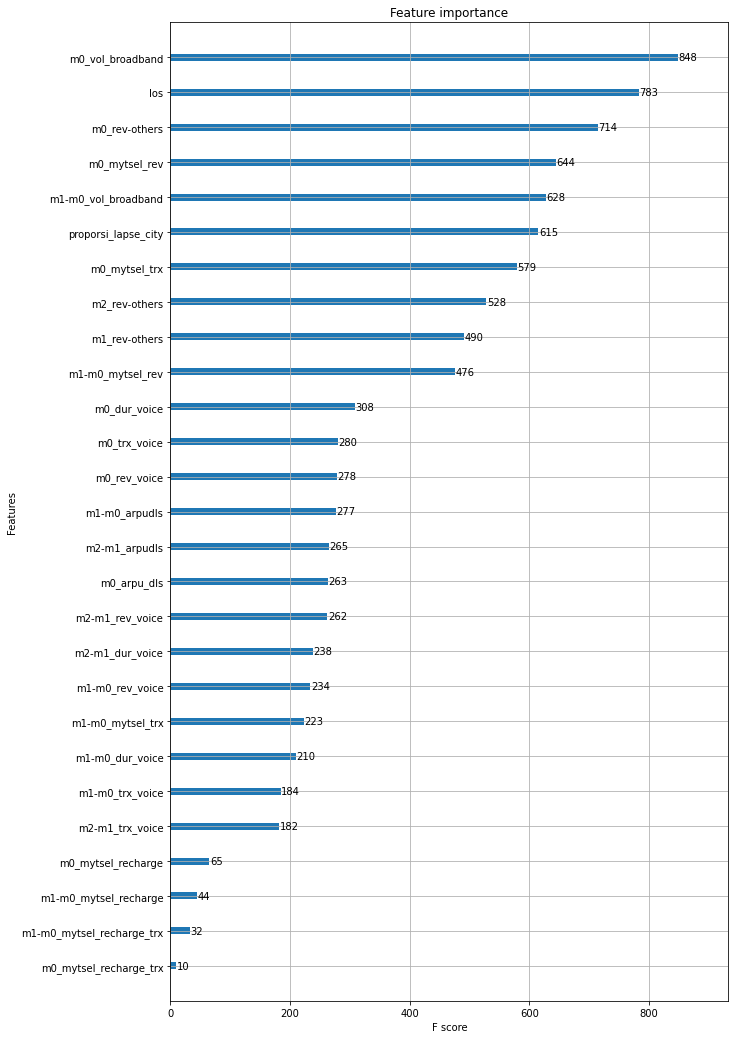

In [ ]:
fig, ax = pyplot.subplots(figsize=(10, 18));
xgb.plot_importance(model3, ax=ax);

#### Final Prediction

In [ ]:
basedata_all_city_num

,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice,proporsi_lapse_city
0,1088.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,32827011000.000,110000.000,22000.000,2780.000,73010.000,1,0.000,0,-2078.000,4.000,11674.000,6063833000.000,99010.000,-1460.000,0.000,-3.000,-4520.000,0.375
1,126.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,3612966000.000,0.000,0.000,-3485.000,-73000.000,-1,0.000,0,0.000,-6.000,-280.000,-3612966000.000,38015.000,0.000,0.000,0.000,0.000,0.304
2,349.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,42025378000.000,0.000,0.000,0.000,-88000.000,-1,-10000.000,-1,12992.000,5.000,340.000,-15700927000.000,206015.000,0.000,3344.000,41.000,18796.000,0.606
3,804.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,55975846000.000,80000.000,85870.000,-98159.400,80010.000,3,10000.000,1,0.000,5.000,202.000,35044644000.000,457036.000,7726.400,0.000,8.000,151.000,0.530
4,946.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,93820764000.000,0.000,26160.000,0.000,191000.000,1,0.000,0,23200.000,1.000,3478.000,10479796000.000,399040.000,0.000,-23200.000,-1.000,-3478.000,0.301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1207.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,36685740000.000,180000.000,0.000,-1385.000,116780.000,-2,0.000,0,0.000,-224.000,-7997.000,-15167896000.000,12936.000,0.000,0.000,-5.000,-5465.000,0.361
999996,9320.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,1006717950.000,75260.000,-580.000,0.000,0.000,0,0.000,0,1076.000,3.000,1422.000,-1003290622.000,14601.000,0.000,-6576.000,-6.000,-1452.000,0.395
999997,167.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,13912436000.000,83319.000,26974.000,-40264.000,14100.000,3,-10000.000,-1,22016.000,24.000,20919.000,-1442764000.000,91005.000,38810.000,-22343.000,-27.000,-21854.000,0.280
999998,1332.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,15545127000.000,4970.000,0.000,0.000,0.000,0,0.000,0,10.000,1.000,7112.000,-1517033000.000,75000.000,0.000,10.000,1.000,-5020.000,0.303


In [ ]:
#pred_lapse = model3.predict(basedata_city_num, ntree_limit=model3.best_ntree_limit)
#cm_pred_lapse = sk.metrics.confusion_matrix
#cm_pred_lapse(basedata_4['mytsel_lapse'], pred_lapse)

pred_lapse = model3.predict(basedata_all_city_num, ntree_limit=model3.best_ntree_limit)
cm_pred_lapse = sk.metrics.confusion_matrix
cm_pred_lapse(basedata_all_lapse, pred_lapse)


array([[518004, 189167],
       [ 77925, 214904]])

In [ ]:
#print(classification_report(basedata_4['mytsel_lapse'],pred_lapse))


print(classification_report(basedata_all_lapse,pred_lapse))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80    707171
           1       0.53      0.73      0.62    292829

    accuracy                           0.73   1000000
   macro avg       0.70      0.73      0.71   1000000
weighted avg       0.77      0.73      0.74   1000000



#### Merging Result
Merge result ke data awal

In [ ]:
basedata_merge = basedata_clean_all
basedata_merge['preds'] = pred_lapse

#df_out = pd.merge(df,y_test[['preds']],how = 'left',left_index = True, right_index = True)
basedata_merge

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area,preds
0,0,465005,0,122418.000,198170.000,1088.000,122418.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,0.000,0.000,32827011000.000,109630.000,11120.000,75010.000,2,0.000,0,0.000,11.000,12338.000,1500.000,51.000,38890844000.000,108670.000,9660.000,0.000,8.000,7818.000,0.000,10.000,30603385000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1,1
1,1,272500,0,76835.000,64167.000,126.000,76835.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,350.000,9.000,3612966000.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,38015.000,0.000,0.000,0.000,0.000,0.000,0.000,9510331000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4,1
2,2,713785,0,180350.000,67658.000,349.000,180350.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,350.000,1.000,42025378000.000,104992.000,0.000,92000.000,2,0.000,0,12992.000,12.000,4669.000,0.000,0.000,26324451000.000,222351.000,0.000,16336.000,53.000,23465.000,0.000,0.000,25965871000.000,KOTA SERANG,04.Western Jabotabek,AREA 2,0
3,3,123273,0,342633.000,170983.400,804.000,342633.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,0.000,14.000,55975846000.000,330353.600,4473.600,240010.000,5,10000.000,1,0.000,5.000,202.000,0.000,3.000,91020490000.000,469236.000,12200.000,0.000,13.000,353.000,0.000,28.000,148611600000.000,KERINCI,03.Sumbagsel,AREA 1,0
4,4,841937,0,191000.000,656710.000,946.000,191000.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,0.000,0.000,93820764000.000,431360.000,0.000,382000.000,2,0.000,0,23200.000,1.000,3478.000,0.000,0.000,104300560000.000,399040.000,0.000,0.000,0.000,0.000,0.000,0.000,97076880000.000,SUMEDANG,07.Jabar,AREA 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,532251,0,189980.000,28835.000,1207.000,189980.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,375.000,8.000,36685740000.000,125000.000,0.000,125000.000,2,0.000,0,0.000,30.000,7087.000,0.000,0.000,21517844000.000,12936.000,0.000,0.000,25.000,1622.000,0.000,1.000,6480602000.000,MUKOMUKO,03.Sumbagsel,AREA 1,1
999996,999996,160288,0,86260.000,26292.000,9320.000,86260.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,0.000,0.000,1006717950.000,11496.000,0.000,5500.000,2,0.000,0,6576.000,6.000,1452.000,0.000,0.000,3427328.000,14601.000,0.000,0.000,0.000,0.000,0.000,0.000,15474688.000,KOTA SAMARINDA,11.Kalimantan,AREA 4,1
999997,999997,692025,0,137998.000,242494.000,167.000,137998.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,700.000,3.000,13912436000.000,77155.000,3696.000,18800.000,4,0.000,0,27335.000,31.000,22621.000,350.000,1.000,12469672000.000,138853.000,42506.000,4992.000,4.000,767.000,350.000,1.000,9813585000.000,KOTA PEMATANG SIANTAR,01.Sumbagut,AREA 1,1
999998,999998,499608,0,79970.000,75000.000,1332.000,79970.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,0.000,0.000,15545127000.000,75010.000,0.000,75000.000,1,0.000,0,10.000,2.000,7139.000,0.000,0.000,14028094000.000,75020.000,0.000,20.000,3.000,2119.000,0.000,0.000,5409574000.000,BOYOLALI,08.Jateng,AREA 3,0


In [ ]:
cm_merge = sk.metrics.confusion_matrix
cm_merge(basedata_merge['mytsel_lapse'], basedata_merge['preds'])

array([[518004, 189167],
       [ 77925, 214904]])

In [ ]:
print(classification_report(basedata_merge['mytsel_lapse'],basedata_merge['preds']))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80    707171
           1       0.53      0.73      0.62    292829

    accuracy                           0.73   1000000
   macro avg       0.70      0.73      0.71   1000000
weighted avg       0.77      0.73      0.74   1000000



#### Merge Result 2

In [ ]:
basedata_merge_2 = basedata_all_city_num
basedata_merge_2['preds'] = pred_lapse

#df_out = pd.merge(df,y_test[['preds']],how = 'left',left_index = True, right_index = True)
basedata_merge_2

,los,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_vol_broadband,m0_rev-others,m1_rev-others,m1-m0_arpudls,m1-m0_mytsel_rev,m1-m0_mytsel_trx,m1-m0_mytsel_recharge,m1-m0_mytsel_recharge_trx,m1-m0_rev_voice,m1-m0_trx_voice,m1-m0_dur_voice,m1-m0_vol_broadband,m2_rev-others,m2-m1_arpudls,m2-m1_rev_voice,m2-m1_trx_voice,m2-m1_dur_voice,proporsi_lapse_city,preds
0,1088.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,32827011000.000,110000.000,22000.000,2780.000,73010.000,1,0.000,0,-2078.000,4.000,11674.000,6063833000.000,99010.000,-1460.000,0.000,-3.000,-4520.000,0.375,1
1,126.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,3612966000.000,0.000,0.000,-3485.000,-73000.000,-1,0.000,0,0.000,-6.000,-280.000,-3612966000.000,38015.000,0.000,0.000,0.000,0.000,0.304,1
2,349.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,42025378000.000,0.000,0.000,0.000,-88000.000,-1,-10000.000,-1,12992.000,5.000,340.000,-15700927000.000,206015.000,0.000,3344.000,41.000,18796.000,0.606,0
3,804.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,55975846000.000,80000.000,85870.000,-98159.400,80010.000,3,10000.000,1,0.000,5.000,202.000,35044644000.000,457036.000,7726.400,0.000,8.000,151.000,0.530,0
4,946.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,93820764000.000,0.000,26160.000,0.000,191000.000,1,0.000,0,23200.000,1.000,3478.000,10479796000.000,399040.000,0.000,-23200.000,-1.000,-3478.000,0.301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1207.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,36685740000.000,180000.000,0.000,-1385.000,116780.000,-2,0.000,0,0.000,-224.000,-7997.000,-15167896000.000,12936.000,0.000,0.000,-5.000,-5465.000,0.361,1
999996,9320.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,1006717950.000,75260.000,-580.000,0.000,0.000,0,0.000,0,1076.000,3.000,1422.000,-1003290622.000,14601.000,0.000,-6576.000,-6.000,-1452.000,0.395,1
999997,167.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,13912436000.000,83319.000,26974.000,-40264.000,14100.000,3,-10000.000,-1,22016.000,24.000,20919.000,-1442764000.000,91005.000,38810.000,-22343.000,-27.000,-21854.000,0.280,1
999998,1332.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,15545127000.000,4970.000,0.000,0.000,0.000,0,0.000,0,10.000,1.000,7112.000,-1517033000.000,75000.000,0.000,10.000,1.000,-5020.000,0.303,0


## CLUSTERING (sampling, wiht LoS)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

### Normalize Data

In [ ]:
import plotly.express as px

#### Pilih Features

In [ ]:
proporsi_lapse_city= basedata_merge_2['proporsi_lapse_city']

In [ ]:
# Join basedata_merge dgn proporsi lapse sity
basedata_merge_city = basedata_merge
basedata_merge_city = basedata_merge_city.join(proporsi_lapse_city)
basedata_merge_city

,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area,preds,proporsi_lapse_city
0,0,465005,0,122418.000,198170.000,1088.000,122418.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,0.000,0.000,32827011000.000,109630.000,11120.000,75010.000,2,0.000,0,0.000,11.000,12338.000,1500.000,51.000,38890844000.000,108670.000,9660.000,0.000,8.000,7818.000,0.000,10.000,30603385000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1,1,0.375
1,1,272500,0,76835.000,64167.000,126.000,76835.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,350.000,9.000,3612966000.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,38015.000,0.000,0.000,0.000,0.000,0.000,0.000,9510331000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4,1,0.304
2,2,713785,0,180350.000,67658.000,349.000,180350.000,0.000,180000.000,3,10000.000,1,0.000,7.000,4329.000,350.000,1.000,42025378000.000,104992.000,0.000,92000.000,2,0.000,0,12992.000,12.000,4669.000,0.000,0.000,26324451000.000,222351.000,0.000,16336.000,53.000,23465.000,0.000,0.000,25965871000.000,KOTA SERANG,04.Western Jabotabek,AREA 2,0,0.606
3,3,123273,0,342633.000,170983.400,804.000,342633.000,102633.000,160000.000,2,0.000,0,0.000,0.000,0.000,0.000,14.000,55975846000.000,330353.600,4473.600,240010.000,5,10000.000,1,0.000,5.000,202.000,0.000,3.000,91020490000.000,469236.000,12200.000,0.000,13.000,353.000,0.000,28.000,148611600000.000,KERINCI,03.Sumbagsel,AREA 1,0,0.530
4,4,841937,0,191000.000,656710.000,946.000,191000.000,0.000,191000.000,1,0.000,0,0.000,0.000,0.000,0.000,0.000,93820764000.000,431360.000,0.000,382000.000,2,0.000,0,23200.000,1.000,3478.000,0.000,0.000,104300560000.000,399040.000,0.000,0.000,0.000,0.000,0.000,0.000,97076880000.000,SUMEDANG,07.Jabar,AREA 2,0,0.301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,532251,0,189980.000,28835.000,1207.000,189980.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,375.000,8.000,36685740000.000,125000.000,0.000,125000.000,2,0.000,0,0.000,30.000,7087.000,0.000,0.000,21517844000.000,12936.000,0.000,0.000,25.000,1622.000,0.000,1.000,6480602000.000,MUKOMUKO,03.Sumbagsel,AREA 1,1,0.361
999996,999996,160288,0,86260.000,26292.000,9320.000,86260.000,0.000,5500.000,2,0.000,0,5500.000,3.000,30.000,0.000,0.000,1006717950.000,11496.000,0.000,5500.000,2,0.000,0,6576.000,6.000,1452.000,0.000,0.000,3427328.000,14601.000,0.000,0.000,0.000,0.000,0.000,0.000,15474688.000,KOTA SAMARINDA,11.Kalimantan,AREA 4,1,0.395
999997,999997,692025,0,137998.000,242494.000,167.000,137998.000,43960.000,4700.000,1,10000.000,1,5319.000,7.000,1702.000,700.000,3.000,13912436000.000,77155.000,3696.000,18800.000,4,0.000,0,27335.000,31.000,22621.000,350.000,1.000,12469672000.000,138853.000,42506.000,4992.000,4.000,767.000,350.000,1.000,9813585000.000,KOTA PEMATANG SIANTAR,01.Sumbagut,AREA 1,1,0.280
999998,999998,499608,0,79970.000,75000.000,1332.000,79970.000,0.000,75000.000,1,0.000,0,0.000,1.000,27.000,0.000,0.000,15545127000.000,75010.000,0.000,75000.000,1,0.000,0,10.000,2.000,7139.000,0.000,0.000,14028094000.000,75020.000,0.000,20.000,3.000,2119.000,0.000,0.000,5409574000.000,BOYOLALI,08.Jateng,AREA 3,0,0.303


In [ ]:
#Pilih feature
data_cluster = basedata_merge_city[basedata_merge_city['preds']==1]

#'mytsel_lapse', 'arpu_30d_before',
#'arpu_30d_after', 'los', 'm0_arpu_all', 'm0_arpu_dls',
#'m0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx',
#'m0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms',

data_clus_1 = data_cluster[['m0_vol_broadband', 
#'m1_vol_broadband',
#'los', 
#'m0_arpu_all', 
#'m1_arpu_all', 
'm0_mytsel_rev',
#'m1_mytsel_rev',   
'm0_mytsel_trx', 
'm0_trx_voice', 
'm0_dur_voice',
#'proporsi_lapse_city',
'm0_arpu_dls',
#'m0_mytsel_recharge',
'm0_mytsel_recharge_trx',
]]

data_clus_1_1 = data_cluster
data_clus_1_1['avg_vol_broadband'] = data_clus_1_1[['m0_vol_broadband', 'm1_vol_broadband']].mean(axis=1)
data_clus_1_1['avg_mytsel_rev'] = data_clus_1_1[['m0_mytsel_rev', 'm1_mytsel_rev']].mean(axis=1)
data_clus_1_1['avg_mytsel_trx'] = data_clus_1_1[['m0_mytsel_trx', 'm1_mytsel_trx']].mean(axis=1)
data_clus_1_1['avg_dur_voice'] = data_clus_1_1[['m0_dur_voice', 'm1_dur_voice']].mean(axis=1)
data_clus_1_1['avg_trx_voice'] = data_clus_1_1[['m0_trx_voice', 'm1_trx_voice']].mean(axis=1)
data_clus_1_1['avg_arpu_dls'] = data_clus_1_1[['m0_arpu_dls', 'm1_arpu_dls']].mean(axis=1)
data_clus_1_1['avg_mytsel_recharge_trx'] = data_clus_1_1[['m0_mytsel_recharge_trx', 'm1_mytsel_recharge_trx']].mean(axis=1)

xdata_clus_1 = data_clus_1_1[[
##'m0_vol_broadband', 
#'m1_vol_broadband',
#'los', 
#'m0_arpu_all', 
#'m1_arpu_all', 
##'m0_mytsel_rev',
#'m1_mytsel_rev',   
##'m0_mytsel_trx', 
##'m0_trx_voice', 
##'m0_dur_voice',
#'proporsi_lapse_city',
##'m0_arpu_dls',
#'m0_mytsel_recharge',
##'m0_mytsel_recharge_trx',
'avg_vol_broadband',
'avg_mytsel_rev',
'avg_mytsel_trx',
'avg_dur_voice',
'avg_trx_voice',
'avg_arpu_dls',
'avg_mytsel_recharge_trx',
]]

data_cluster_clean0 = data_clus_1.reset_index()
data_cluster_clean = data_cluster_clean0.drop(columns = ['index'])
data_cluster_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,32827011000.000,2000.000,1,7.000,664.000,8340.000,0
1,3612966000.000,73000.000,1,6.000,280.000,3485.000,0
2,10296908000.000,39000.000,1,20.000,4897.000,0.000,2
3,21686862000.000,5000.000,1,0.000,0.000,0.000,0
4,14500490000.000,115000.000,1,4.000,207.000,0.000,0
...,...,...,...,...,...,...,...
404066,6270814000.000,2000.000,2,11.000,15006.000,152360.000,2
404067,14122929000.000,10.000,1,50.000,1352.000,4496.000,0
404068,36685740000.000,8220.000,4,254.000,15084.000,1385.000,0
404069,1006717950.000,5500.000,2,3.000,30.000,0.000,0


In [ ]:
list(data_clus_1.columns)

['m0_vol_broadband',
 'm0_mytsel_rev',
 'm0_mytsel_trx',
 'm0_trx_voice',
 'm0_dur_voice',
 'm0_arpu_dls',
 'm0_mytsel_recharge_trx']

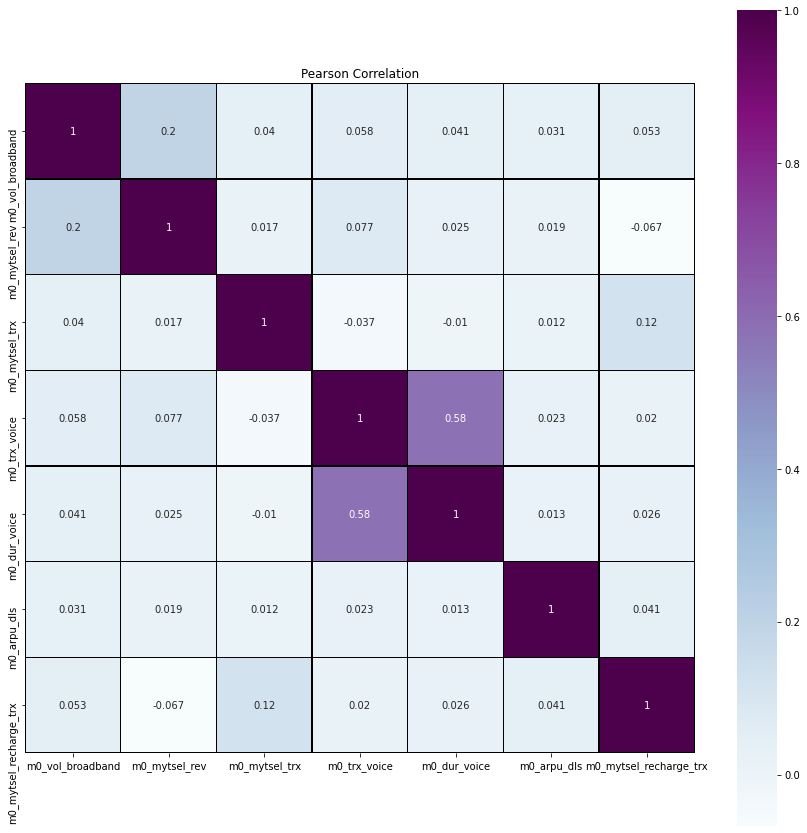

In [ ]:
#Setting Figure
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson Correlation')

#exclude area region
#basedata_city_num = basedata_agg_city.drop(columns=['city','region', 'area', 'Unnamed: 0', 'mytsel_lapse', 'cat_city', 'per_city'])

#Membuat Visualisasi Correlation Pearson
#sns.heatmap(data_cluster_clean.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)
sns.heatmap(data_cluster_clean.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)


In [ ]:
data_cluster_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404071 entries, 0 to 404070
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   m0_vol_broadband        404071 non-null  float64
 1   m0_mytsel_rev           404071 non-null  float64
 2   m0_mytsel_trx           404071 non-null  int64  
 3   m0_trx_voice            404071 non-null  float64
 4   m0_dur_voice            404071 non-null  float64
 5   m0_arpu_dls             404071 non-null  float64
 6   m0_mytsel_recharge_trx  404071 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 21.6 MB


#### Standardize

In [ ]:
clus_std0 =(data_cluster_clean-data_cluster_clean.min())/(data_cluster_clean.max()-data_cluster_clean.min())
clus_std0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404071 entries, 0 to 404070
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   m0_vol_broadband        404071 non-null  float64
 1   m0_mytsel_rev           404071 non-null  float64
 2   m0_mytsel_trx           404071 non-null  float64
 3   m0_trx_voice            404071 non-null  float64
 4   m0_dur_voice            404071 non-null  float64
 5   m0_arpu_dls             404071 non-null  float64
 6   m0_mytsel_recharge_trx  404071 non-null  float64
dtypes: float64(7)
memory usage: 21.6 MB


In [ ]:
clus_std0.describe()

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
count,404071.000,404071.000,404071.000,404071.000,404071.000,404071.000,404071.000
mean,0.007,0.025,0.012,0.006,0.004,0.002,0.006
std,0.009,0.024,0.031,0.015,0.015,0.003,0.022
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.001,0.006,0.000,0.000,0.000,0.001,0.000
50%,0.005,0.019,0.000,0.001,0.000,0.001,0.000
75%,0.011,0.037,0.000,0.005,0.002,0.002,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Sampling

In [ ]:
round0 = int(len(clus_std0) * 0.1)
round0

40407

In [ ]:
data_clus_clean_indices0 = list(clus_std0.index.values)
type(data_clus_clean_indices0)

list

In [ ]:
rand_clus0 = np.random.choice(data_clus_clean_indices0,
                             size = round0, 
                             replace=False)
print((rand_clus0))

[192634 303907 368185 ... 154594 295051 336454]


In [ ]:
clus_std0_sampling = clus_std0.loc[rand_clus0]


print(np.shape(clus_std0_sampling))
clus_std0_sampling.head(5)

(40407, 7)


,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
192634,0.010,0.008,0.107,0.000,0.000,0.001,0.000
303907,0.001,0.004,0.036,0.000,0.000,0.001,0.000
368185,0.044,0.053,0.000,0.000,0.000,0.221,0.087
299191,0.001,0.045,0.000,0.000,0.000,0.001,0.000
267370,0.011,0.117,0.036,0.006,0.004,0.001,0.000


In [ ]:
clus_std0_sampling_resind = clus_std0_sampling.reset_index()
clus_std0_sampling_resind

,index,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,192634,0.010,0.008,0.107,0.000,0.000,0.001,0.000
1,303907,0.001,0.004,0.036,0.000,0.000,0.001,0.000
2,368185,0.044,0.053,0.000,0.000,0.000,0.221,0.087
3,299191,0.001,0.045,0.000,0.000,0.000,0.001,0.000
4,267370,0.011,0.117,0.036,0.006,0.004,0.001,0.000
...,...,...,...,...,...,...,...,...
40402,367489,0.008,0.084,0.000,0.000,0.000,0.001,0.000
40403,147414,0.024,0.036,0.000,0.000,0.000,0.001,0.000
40404,154594,0.001,0.069,0.000,0.000,0.000,0.005,0.000
40405,295051,0.003,0.049,0.000,0.000,0.000,0.001,0.000


In [ ]:
data_cluster_clean_sampling0 = data_cluster_clean.loc[rand_clus0].reset_index()
data_cluster_clean_sampling0

,index,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,192634,21927457000.000,15500.000,4,0.000,0.000,400.000,0
1,303907,1861015600.000,9000.000,2,0.000,0.000,0.000,0
2,368185,101208400000.000,107000.000,1,0.000,0.000,8298778.530,2
3,299191,1611013100.000,90000.000,1,0.000,0.000,0.000,0
4,267370,25645994000.000,236000.000,2,26.000,4681.000,75.000,0
...,...,...,...,...,...,...,...,...
40402,367489,18025210000.000,168000.000,1,0.000,0.000,0.000,0
40403,147414,55729700000.000,73000.000,1,2.000,73.000,0.000,0
40404,154594,3280513000.000,139000.000,1,1.000,175.000,139001.000,0
40405,295051,7672137700.000,98000.000,1,0.000,0.000,0.000,0


In [ ]:
#labels_samp = sampling_data_clus_clean['labels']

In [ ]:
#sampling_data_clus_clean_feat = sampling_data_clus_clean.drop(columns=['labels'])

In [ ]:
#sampling_data_clus_clean_feat

### KMeans

In [ ]:
list(data_clus_1.columns)

['m0_vol_broadband',
 'm0_mytsel_rev',
 'm0_mytsel_trx',
 'm0_trx_voice',
 'm0_dur_voice',
 'm0_arpu_dls',
 'm0_mytsel_recharge_trx']

In [ ]:
clus_std_kmean0 = clus_std0_sampling_resind[list(data_clus_1.columns)] #['m0_vol_broadband', 
#'m1_vol_broadband',
#'los', 
#'m0_arpu_all', 
#'m1_arpu_all', 
#'m0_mytsel_rev',
#'m1_mytsel_rev',   
#'m0_mytsel_trx', 
#'m0_trx_voice', 
#]]

clus_std_kmean0

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,0.010,0.008,0.107,0.000,0.000,0.001,0.000
1,0.001,0.004,0.036,0.000,0.000,0.001,0.000
2,0.044,0.053,0.000,0.000,0.000,0.221,0.087
3,0.001,0.045,0.000,0.000,0.000,0.001,0.000
4,0.011,0.117,0.036,0.006,0.004,0.001,0.000
...,...,...,...,...,...,...,...
40402,0.008,0.084,0.000,0.000,0.000,0.001,0.000
40403,0.024,0.036,0.000,0.000,0.000,0.001,0.000
40404,0.001,0.069,0.000,0.000,0.000,0.005,0.000
40405,0.003,0.049,0.000,0.000,0.000,0.001,0.000


In [ ]:
inertia0 = []
K0 = range(1,15)
for k in K0:
    kmeanModel = KMeans(n_clusters=k).fit(clus_std_kmean0)
    kmeanModel.fit(clus_std_kmean0)
    inertia0.append(kmeanModel.inertia_)

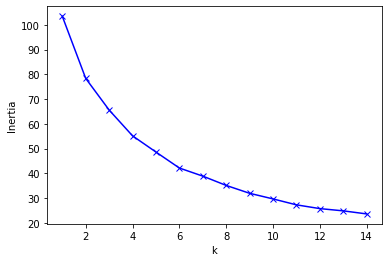

In [ ]:
# Plot the elbow
plt.plot(K0, inertia0, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
start = timer()
sil0 = []
kmax0 = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax0+1):
  kmeans1 = KMeans(n_clusters = k).fit(clus_std_kmean0)
  labels_k = kmeans1.labels_
  sil0.append(silhouette_score(clus_std_kmean0, labels_k, metric = 'euclidean'))

sil0
end = timer()

print (end - start)

382.1614058109999


In [ ]:
sil01= pd.DataFrame(sil0)
sil01.index = sil01.index + 2
sil01

,0
2,0.582
3,0.319
4,0.353
5,0.369
6,0.395
7,0.399
8,0.402
9,0.404
10,0.410
11,0.416


In [ ]:
k0 = 4 #max_sil
kmeans0 = KMeans(n_clusters=k0).fit(clus_std_kmean0)

### Merge Label

In [ ]:
#kasih labels ke original data set
labels0 = pd.DataFrame(kmeans0.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeled0 = pd.concat((data_cluster_clean_sampling0,labels0),axis=1)
labeled0 = labeled0.rename({0:'labels'},axis=1)
labeled0



,index,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
0,192634,21927457000.000,15500.000,4,0.000,0.000,400.000,0,2
1,303907,1861015600.000,9000.000,2,0.000,0.000,0.000,0,3
2,368185,101208400000.000,107000.000,1,0.000,0.000,8298778.530,2,1
3,299191,1611013100.000,90000.000,1,0.000,0.000,0.000,0,0
4,267370,25645994000.000,236000.000,2,26.000,4681.000,75.000,0,0
...,...,...,...,...,...,...,...,...,...
40402,367489,18025210000.000,168000.000,1,0.000,0.000,0.000,0,0
40403,147414,55729700000.000,73000.000,1,2.000,73.000,0.000,0,0
40404,154594,3280513000.000,139000.000,1,1.000,175.000,139001.000,0,0
40405,295051,7672137700.000,98000.000,1,0.000,0.000,0.000,0,0


In [ ]:
clus_std_kmean0

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,0.010,0.008,0.107,0.000,0.000,0.001,0.000
1,0.001,0.004,0.036,0.000,0.000,0.001,0.000
2,0.044,0.053,0.000,0.000,0.000,0.221,0.087
3,0.001,0.045,0.000,0.000,0.000,0.001,0.000
4,0.011,0.117,0.036,0.006,0.004,0.001,0.000
...,...,...,...,...,...,...,...
40402,0.008,0.084,0.000,0.000,0.000,0.001,0.000
40403,0.024,0.036,0.000,0.000,0.000,0.001,0.000
40404,0.001,0.069,0.000,0.000,0.000,0.005,0.000
40405,0.003,0.049,0.000,0.000,0.000,0.001,0.000


In [ ]:
#kasih labels ke standardized dataset
#labels = pd.DataFrame(kmeans0.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
clus_std_kmean_resin = clus_std_kmean0.reset_index()

labeled_std0 = pd.concat((clus_std_kmean0,labels0),axis=1)
labeled_std0 = labeled_std0.rename({0:'labels'},axis=1)
labeled_std0


,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
0,0.010,0.008,0.107,0.000,0.000,0.001,0.000,2
1,0.001,0.004,0.036,0.000,0.000,0.001,0.000,3
2,0.044,0.053,0.000,0.000,0.000,0.221,0.087,1
3,0.001,0.045,0.000,0.000,0.000,0.001,0.000,0
4,0.011,0.117,0.036,0.006,0.004,0.001,0.000,0
...,...,...,...,...,...,...,...,...
40402,0.008,0.084,0.000,0.000,0.000,0.001,0.000,0
40403,0.024,0.036,0.000,0.000,0.000,0.001,0.000,0
40404,0.001,0.069,0.000,0.000,0.000,0.005,0.000,0
40405,0.003,0.049,0.000,0.000,0.000,0.001,0.000,0


### Describe

In [ ]:
count_clus0 = labeled0.groupby(by =['labels']).size().reset_index(name='counts')
count_clus0['%'] = count_clus0.counts / count_clus0.counts.sum() *100
count_clus0

,labels,counts,%
0,0,13650,33.781
1,1,3574,8.845
2,2,2755,6.818
3,3,20428,50.556


In [ ]:
labeled0[labeled0['labels']==1].describe()

,index,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
count,3574.000,3574.000,3574.000,3574.000,3574.000,3574.000,3574.000,3574.000,3574.000
mean,203057.602,20520561911.513,36465.375,1.322,28.451,6254.178,24568.313,1.408,1.000
std,115872.746,23431634800.300,35142.810,0.577,68.400,22850.046,167038.776,0.920,0.000
min,2.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000
25%,104584.250,5292285000.000,7212.500,1.000,0.000,0.000,0.000,1.000,1.000
50%,201700.500,14360794500.000,24000.000,1.000,5.000,302.500,2640.000,1.000,1.000
75%,302724.500,28533088250.000,61000.000,2.000,24.000,3693.250,16995.000,1.000,1.000
max,403965.000,427312450000.000,222000.000,5.000,1323.000,763693.000,8298778.530,12.000,1.000


In [ ]:
labeled0_1 = labeled0.drop(columns = 'index')
labeled0_1

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
0,21927457000.000,15500.000,4,0.000,0.000,400.000,0,2
1,1861015600.000,9000.000,2,0.000,0.000,0.000,0,3
2,101208400000.000,107000.000,1,0.000,0.000,8298778.530,2,1
3,1611013100.000,90000.000,1,0.000,0.000,0.000,0,0
4,25645994000.000,236000.000,2,26.000,4681.000,75.000,0,0
...,...,...,...,...,...,...,...,...
40402,18025210000.000,168000.000,1,0.000,0.000,0.000,0,0
40403,55729700000.000,73000.000,1,2.000,73.000,0.000,0,0
40404,3280513000.000,139000.000,1,1.000,175.000,139001.000,0,0
40405,7672137700.000,98000.000,1,0.000,0.000,0.000,0,0


### Grafik

In [ ]:
labeled0_1['Constant'] = "Data"

In [ ]:
labeled0_2 = labeled_std0 #.drop (columns = 'index')
labeled0_2

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
0,0.010,0.008,0.107,0.000,0.000,0.001,0.000,2
1,0.001,0.004,0.036,0.000,0.000,0.001,0.000,3
2,0.044,0.053,0.000,0.000,0.000,0.221,0.087,1
3,0.001,0.045,0.000,0.000,0.000,0.001,0.000,0
4,0.011,0.117,0.036,0.006,0.004,0.001,0.000,0
...,...,...,...,...,...,...,...,...
40402,0.008,0.084,0.000,0.000,0.000,0.001,0.000,0
40403,0.024,0.036,0.000,0.000,0.000,0.001,0.000,0
40404,0.001,0.069,0.000,0.000,0.000,0.005,0.000,0
40405,0.003,0.049,0.000,0.000,0.000,0.001,0.000,0


In [ ]:
polar0=labeled0_2.groupby("labels").mean().reset_index()
polar0=pd.melt(polar0,id_vars=["labels"])
fig4 = px.line_polar(polar0, r="value", theta="variable", color="labels", line_close=True,height=600,width=700)
fig4.show()

0.5506969090001803


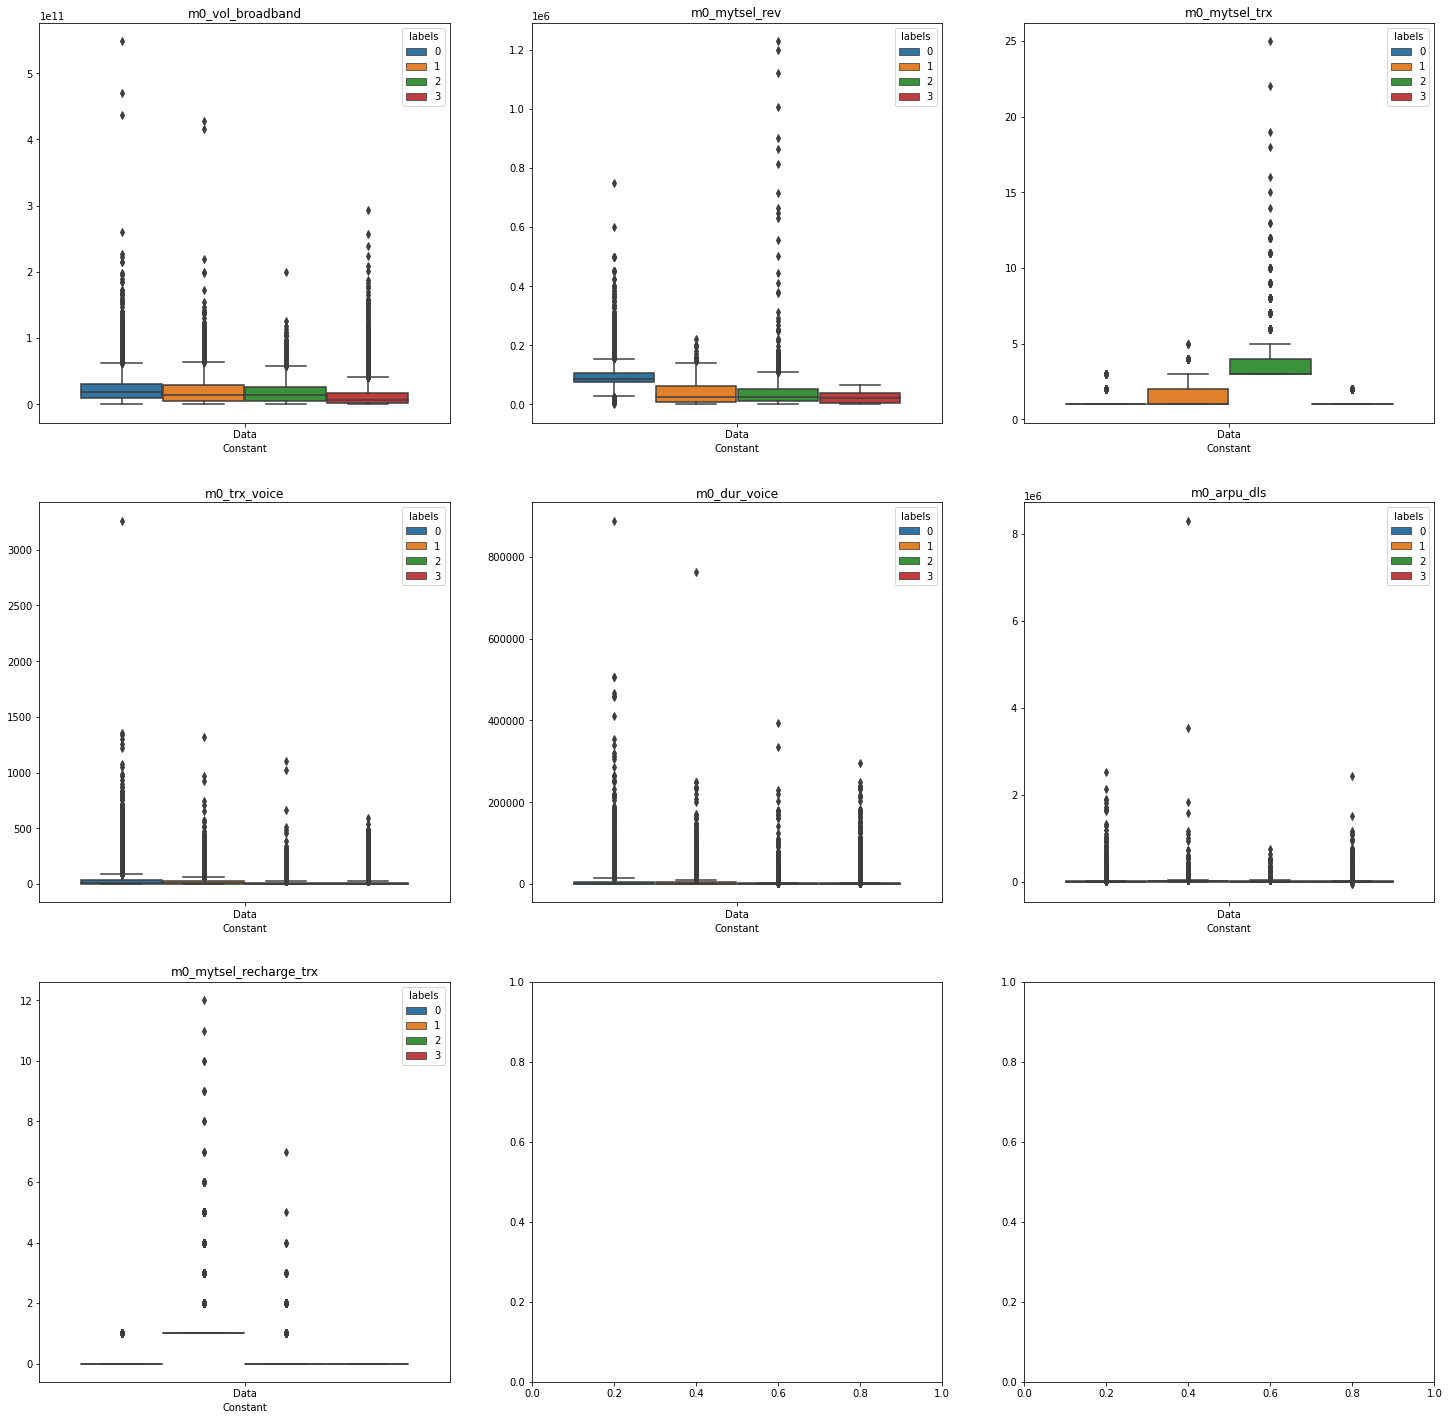

In [ ]:
start = timer()


f, axes = plt.subplots(3, 3, figsize=(25, 25), sharex=False) #create a 4x5 grid of empty figures where we will plot our feature plots. We will have a couple empty ones.
f.subplots_adjust(hspace=0.2, wspace=0.2) #Scooch em apart, give em some room
#In this for loop, I step through every column that I want to plot. This is a 4x5 grid, so I split this up by rows of 5 in the else if statements
for i in range(0,len(list(labeled0_1))-2): #minus two because I don't want to plot labels or constant
    col = labeled0_1.columns[i]
    if i < 3:
        ax = sns.boxplot(x=labeled0_1['Constant'],y=labeled0_1[col].values,hue=labeled0_1['labels'],ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 3 and i<6:
        ax = sns.boxplot(x=labeled0_1['Constant'],y=labeled0_1[col].values,hue=labeled0_1['labels'],ax=axes[1,(i-3)]) #so if i=6 it is row 1 column 1
        ax.set_title(col)
    elif i >= 6 and i<9:
        ax = sns.boxplot(x=labeled0_1['Constant'],y=labeled0_1[col].values,hue=labeled0_1['labels'],ax=axes[2,(i-6)])
        ax.set_title(col)
    elif i >= 9:
        ax = sns.boxplot(x=labeled0_1['Constant'],y=labeled0_1[col].values,hue=labeled0_1['labels'],ax=axes[3,(i-9)])
        ax.set_title(col)
        
end = timer()
print(end - start)

## Final CLUSTERING

### Standardize Data

#### Pilih Features

In [ ]:
#Pilih feature
#data_cluster = basedata_merge_city[basedata_merge_city['preds']==1]

#'mytsel_lapse', 'arpu_30d_before',
#'arpu_30d_after', 'los', 'm0_arpu_all', 'm0_arpu_dls',
#'m0_mytsel_rev', 'm0_mytsel_trx', 'm0_mytsel_recharge', 'm0_mytsel_recharge_trx',
#'m0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms',

data_clus_f = data_cluster[['m0_vol_broadband', 
#'m1_vol_broadband',
#'los', 
#'m0_arpu_all', 
#'m1_arpu_all', 
'm0_mytsel_rev',
#'m1_mytsel_rev',   
'm0_mytsel_trx', 
'm0_trx_voice', 
'm0_dur_voice',
#'proporsi_lapse_city',
'm0_arpu_dls',
#'m0_mytsel_recharge',
'm0_mytsel_recharge_trx',
]]



data_cluster_clean0f = data_clus_f.reset_index()
data_cluster_clean_f = data_cluster_clean0f.drop(columns = ['index'])
data_cluster_clean_f

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,32827011000.000,2000.000,1,7.000,664.000,8340.000,0
1,3612966000.000,73000.000,1,6.000,280.000,3485.000,0
2,10296908000.000,39000.000,1,20.000,4897.000,0.000,2
3,21686862000.000,5000.000,1,0.000,0.000,0.000,0
4,14500490000.000,115000.000,1,4.000,207.000,0.000,0
...,...,...,...,...,...,...,...
404066,6270814000.000,2000.000,2,11.000,15006.000,152360.000,2
404067,14122929000.000,10.000,1,50.000,1352.000,4496.000,0
404068,36685740000.000,8220.000,4,254.000,15084.000,1385.000,0
404069,1006717950.000,5500.000,2,3.000,30.000,0.000,0


In [ ]:
list(data_clus_f.columns)

['m0_vol_broadband',
 'm0_mytsel_rev',
 'm0_mytsel_trx',
 'm0_trx_voice',
 'm0_dur_voice',
 'm0_arpu_dls',
 'm0_mytsel_recharge_trx']

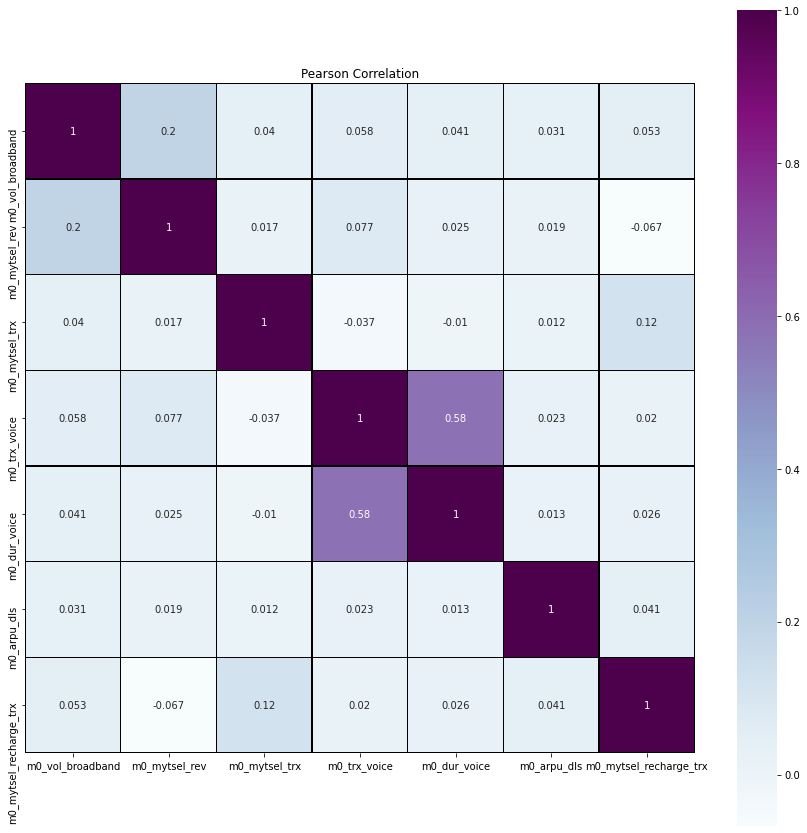

In [ ]:
#Setting Figure
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson Correlation')

#exclude area region
#basedata_city_num = basedata_agg_city.drop(columns=['city','region', 'area', 'Unnamed: 0', 'mytsel_lapse', 'cat_city', 'per_city'])

#Membuat Visualisasi Correlation Pearson
sns.heatmap(data_cluster_clean_f.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)

In [ ]:
data_cluster_clean_f.describe()

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
count,404071.000,404071.000,404071.000,404071.000,404071.000,404071.000,404071.000
mean,17154709896.791,49742.227,1.349,24.078,4552.480,12341.256,0.143
std,20469317065.868,47339.770,0.874,62.131,17120.287,103385.310,0.508
min,0.000,0.000,1.000,0.000,0.000,-55440.000,0.000
25%,3329108000.000,13000.000,1.000,0.000,0.000,0.000,0.000
50%,11333838000.000,39000.000,1.000,3.000,140.000,0.000,0.000
75%,24278848500.000,75000.000,1.000,20.000,2615.000,6800.000,0.000
max,2292242000000.000,2010000.000,29.000,4114.000,1175711.000,37729733.410,23.000


#### Standardize

In [ ]:
clus_std_f =(data_cluster_clean_f-data_cluster_clean_f.min())/(data_cluster_clean_f.max()-data_cluster_clean_f.min())
clus_std_f

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,0.014,0.001,0.000,0.002,0.001,0.002,0.000
1,0.002,0.036,0.000,0.001,0.000,0.002,0.000
2,0.004,0.019,0.000,0.005,0.004,0.001,0.087
3,0.009,0.002,0.000,0.000,0.000,0.001,0.000
4,0.006,0.057,0.000,0.001,0.000,0.001,0.000
...,...,...,...,...,...,...,...
404066,0.003,0.001,0.036,0.003,0.013,0.005,0.087
404067,0.006,0.000,0.000,0.012,0.001,0.002,0.000
404068,0.016,0.004,0.107,0.062,0.013,0.002,0.000
404069,0.000,0.003,0.036,0.001,0.000,0.001,0.000


In [ ]:
clus_std_f.describe()

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
count,404071.000,404071.000,404071.000,404071.000,404071.000,404071.000,404071.000
mean,0.007,0.025,0.012,0.006,0.004,0.002,0.006
std,0.009,0.024,0.031,0.015,0.015,0.003,0.022
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.001,0.006,0.000,0.000,0.000,0.001,0.000
50%,0.005,0.019,0.000,0.001,0.000,0.001,0.000
75%,0.011,0.037,0.000,0.005,0.002,0.002,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### KMeans

In [ ]:
list(data_clus_f.columns)

['m0_vol_broadband',
 'm0_mytsel_rev',
 'm0_mytsel_trx',
 'm0_trx_voice',
 'm0_dur_voice',
 'm0_arpu_dls',
 'm0_mytsel_recharge_trx']

In [ ]:
clus_std_f

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx
0,0.014,0.001,0.000,0.002,0.001,0.002,0.000
1,0.002,0.036,0.000,0.001,0.000,0.002,0.000
2,0.004,0.019,0.000,0.005,0.004,0.001,0.087
3,0.009,0.002,0.000,0.000,0.000,0.001,0.000
4,0.006,0.057,0.000,0.001,0.000,0.001,0.000
...,...,...,...,...,...,...,...
404066,0.003,0.001,0.036,0.003,0.013,0.005,0.087
404067,0.006,0.000,0.000,0.012,0.001,0.002,0.000
404068,0.016,0.004,0.107,0.062,0.013,0.002,0.000
404069,0.000,0.003,0.036,0.001,0.000,0.001,0.000


In [ ]:
inertia = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(clus_std_f)
    kmeanModel.fit(clus_std_f)
    inertia.append(kmeanModel.inertia_)

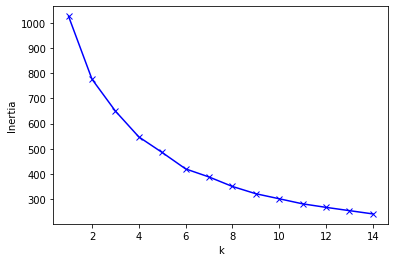

In [ ]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#start = timer()
#sil = []
#kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
#for k in range(5, 5):
#  kmeans1 = KMeans(n_clusters = k).fit(clus_std_f)
#  labels_k = kmeans1.labels_
#  sil.append(silhouette_score(clus_std_f, labels_k, metric = 'euclidean'))

#sil
#end = timer()

#print (end - start)

In [ ]:
#sil= pd.DataFrame(sil)
#sil.index = sil1.index + 5
#sil

In [ ]:
#sil_cluster_f = sil[0]
#max_sil_f = sil_cluster_f.idxmax()
#max_sil_f

In [ ]:
kf = 4 #max_sil
kmeans_f = KMeans(n_clusters=kf).fit(clus_std_f)

### Merge Label

In [ ]:
df

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
0,32827011000.000,2000.000,1,7.000,664.000,8340.000,0,0
1,3612966000.000,73000.000,1,6.000,280.000,3485.000,0,1
2,10296908000.000,39000.000,1,20.000,4897.000,0.000,2,2
3,21686862000.000,5000.000,1,0.000,0.000,0.000,0,0
4,14500490000.000,115000.000,1,4.000,207.000,0.000,0,1
...,...,...,...,...,...,...,...,...
404066,6270814000.000,2000.000,2,11.000,15006.000,152360.000,2,2
404067,14122929000.000,10.000,1,50.000,1352.000,4496.000,0,0
404068,36685740000.000,8220.000,4,254.000,15084.000,1385.000,0,3
404069,1006717950.000,5500.000,2,3.000,30.000,0.000,0,0


In [ ]:
#labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
#clus_std_kmean_resin_f = clus_std_kmean_f.reset_index()

labeled_f_std = pd.concat((clus_std_f,labels_f),axis=1)
labeled_f_std = labeled_f_std.rename({0:'labels'},axis=1)
labeled_f_std


,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
0,0.014,0.001,0.000,0.002,0.001,0.002,0.000,0
1,0.002,0.036,0.000,0.001,0.000,0.002,0.000,1
2,0.004,0.019,0.000,0.005,0.004,0.001,0.087,2
3,0.009,0.002,0.000,0.000,0.000,0.001,0.000,0
4,0.006,0.057,0.000,0.001,0.000,0.001,0.000,1
...,...,...,...,...,...,...,...,...
404066,0.003,0.001,0.036,0.003,0.013,0.005,0.087,2
404067,0.006,0.000,0.000,0.012,0.001,0.002,0.000,0
404068,0.016,0.004,0.107,0.062,0.013,0.002,0.000,3
404069,0.000,0.003,0.036,0.001,0.000,0.001,0.000,0


#### Merge to All Data 

In [ ]:
data_cluster
labeled_f_all = pd.concat((data_cluster.reset_index(),labels_f),axis=1)
labeled_f_all = labeled_f_all.rename({0:'labels'},axis=1)
labeled_f_all

,index,Unnamed: 0,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area,preds,proporsi_lapse_city,avg_vol_broadband,avg_mytsel_rev,avg_mytsel_trx,avg_dur_voice,avg_trx_voice,avg_arpu_dls,avg_mytsel_recharge_trx,labels
0,0,0,465005,0,122418.000,198170.000,1088.000,122418.000,8340.000,2000.000,1,0.000,0,2078.000,7.000,664.000,0.000,0.000,32827011000.000,109630.000,11120.000,75010.000,2,0.000,0,0.000,11.000,12338.000,1500.000,51.000,38890844000.000,108670.000,9660.000,0.000,8.000,7818.000,0.000,10.000,30603385000.000,LIMA PULUH KOTA,02.Sumbagteng,AREA 1,1,0.375,35858927500.000,38505.000,1.500,6501.000,9.000,9730.000,0.000,0
1,1,1,272500,0,76835.000,64167.000,126.000,76835.000,3485.000,73000.000,1,0.000,0,0.000,6.000,280.000,350.000,9.000,3612966000.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,38015.000,0.000,0.000,0.000,0.000,0.000,0.000,9510331000.000,KOTA MAKASSAR,12.Sulawesi,AREA 4,1,0.304,1806483000.000,36500.000,0.500,140.000,3.000,1742.500,0.000,1
2,5,5,452166,1,80333.000,116982.000,1503.000,80333.000,0.000,39000.000,1,20000.000,2,30291.000,20.000,4897.000,325.000,1.000,10296908000.000,54012.000,0.000,0.000,0,0.000,0,54012.000,39.000,7105.000,0.000,0.000,7439602700.000,83418.000,0.000,41232.000,30.000,8691.000,0.000,0.000,4515144700.000,CIREBON,07.Jabar,AREA 2,1,0.283,8868255350.000,19500.000,0.500,6001.000,29.500,0.000,1.000,2
3,9,9,489588,1,63001.000,112004.000,31.000,63001.000,0.000,5000.000,1,0.000,0,0.000,0.000,0.000,0.000,0.000,21686862000.000,28000.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,SUMEDANG,07.Jabar,AREA 2,1,0.301,10843431000.000,2500.000,0.500,0.000,0.000,0.000,0.000,0
4,20,20,146278,0,117795.000,115000.000,228.000,117795.000,0.000,115000.000,1,0.000,0,2795.000,4.000,207.000,0.000,0.000,14500490000.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,7577945000.000,250277.000,0.000,0.000,0.000,0.000,0.000,0.000,15103996000.000,KOTA SURABAYA,09.Jatim,AREA 3,1,0.230,11039217500.000,57500.000,0.500,103.500,2.000,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404066,999993,999993,607416,1,199837.000,189323.600,1391.000,199837.000,152360.000,2000.000,2,20000.000,2,10017.000,11.000,15006.000,23050.000,1301.000,6270814000.000,222000.000,129261.000,0.000,0,20000.000,1,0.000,13.000,12126.000,17500.000,1237.000,37630505000.000,263150.000,81400.000,0.000,11.000,5968.000,31750.000,1122.000,43313918000.000,JAKARTA PUSAT,05.Central Jabotabek,AREA 2,1,0.208,21950659500.000,1000.000,1.000,13566.000,12.000,140810.500,1.500,2
404067,999994,999994,107900,1,150001.000,87003.000,115.000,150001.000,4496.000,10.000,1,0.000,0,37764.000,50.000,1352.000,700.000,2.000,14122929000.000,103940.000,35840.000,63000.000,1,0.000,0,0.000,3.000,114.000,350.000,2.000,7338865700.000,1060.000,1060.000,0.000,0.000,0.000,0.000,0.000,0.000,JAKARTA BARAT,05.Central Jabotabek,AREA 2,1,0.224,10730897350.000,31505.000,1.000,733.000,26.500,20168.000,0.000,0
404068,999995,999995,532251,0,189980.000,28835.000,1207.000,189980.000,1385.000,8220.000,4,0.000,0,0.000,254.000,15084.000,375.000,8.000,36685740000.000,125000.000,0.000,125000.000,2,0.000,0,0.000,30.000,7087.000,0.000,0.000,21517844000.000,12936.000,0.000,0.000,25.000,1622.000,0.000,1.000,6480602000.000,MUKOMUKO,03.Sumbagsel,AREA 1,1,0.361,29101792000.000,66610.000,3.000,1108

### Describe

In [ ]:
count_clus_f = labeled_f.groupby(by =['labels']).size().reset_index(name='counts')
count_clus_f['%'] = count_clus_f.counts / count_clus_f.counts.sum() *100
count_clus_f

,labels,counts,%
0,0,203951,50.474
1,1,136290,33.729
2,2,35928,8.892
3,3,27902,6.905


In [ ]:
labeled_f[labeled_f['labels']==1].describe()

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels
count,136290.000,136290.000,136290.000,136290.000,136290.000,136290.000,136290.000,136290.000
mean,22754852066.797,96633.507,1.142,37.069,6528.282,12621.781,0.010,1.000
std,22964330154.731,38535.021,0.354,83.132,22405.390,142077.399,0.101,0.000
min,0.000,10.000,1.000,0.000,0.000,0.000,0.000,1.000
25%,8868495250.000,75000.000,1.000,1.000,10.000,0.000,0.000,1.000
50%,17995624000.000,86000.000,1.000,8.000,633.000,10.000,0.000,1.000
75%,30469186000.000,106000.000,1.000,37.000,5409.000,5544.000,0.000,1.000
max,2292242000000.000,1918000.000,8.000,4114.000,1175711.000,37729733.410,3.000,1.000


In [ ]:
#labeled_f_1 = labeled_f.drop(columns = 'index')
labeled_f_1 = labeled_f

### Grafik

In [ ]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 41 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1000000 non-null  int64  
 1   id                      1000000 non-null  int64  
 2   mytsel_lapse            1000000 non-null  int64  
 3   arpu_30d_before         1000000 non-null  float64
 4   arpu_30d_after          1000000 non-null  float64
 5   los                     999934 non-null   float64
 6   m0_arpu_all             1000000 non-null  float64
 7   m0_arpu_dls             1000000 non-null  float64
 8   m0_mytsel_rev           1000000 non-null  float64
 9   m0_mytsel_trx           1000000 non-null  int64  
 10  m0_mytsel_recharge      1000000 non-null  float64
 11  m0_mytsel_recharge_trx  1000000 non-null  int64  
 12  m0_rev_voice            753607 non-null   float64
 13  m0_trx_voice            753607 non-null   float64
 14  m0_

In [ ]:
labeled_f_1['Constant'] = "Data"

In [ ]:
labeled_f_1

,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_trx_voice,m0_dur_voice,m0_arpu_dls,m0_mytsel_recharge_trx,labels,Constant
0,32827011000.000,2000.000,1,7.000,664.000,8340.000,0,0,Data
1,3612966000.000,73000.000,1,6.000,280.000,3485.000,0,1,Data
2,10296908000.000,39000.000,1,20.000,4897.000,0.000,2,2,Data
3,21686862000.000,5000.000,1,0.000,0.000,0.000,0,0,Data
4,14500490000.000,115000.000,1,4.000,207.000,0.000,0,1,Data
...,...,...,...,...,...,...,...,...,...
404066,6270814000.000,2000.000,2,11.000,15006.000,152360.000,2,2,Data
404067,14122929000.000,10.000,1,50.000,1352.000,4496.000,0,0,Data
404068,36685740000.000,8220.000,4,254.000,15084.000,1385.000,0,3,Data
404069,1006717950.000,5500.000,2,3.000,30.000,0.000,0,0,Data


In [ ]:
#labeled_f_2 = labeled_f_std.drop (columns = 'index')
labeled_f_2 = labeled_f_std

In [ ]:
polar=labeled_f_2.groupby("labels").mean().reset_index()
polar=pd.melt(polar,id_vars=["labels"])
fig_f = px.line_polar(polar, r="value", theta="variable", color="labels", line_close=True,height=600,width=700)
fig_f.show()

1.8785633910001707


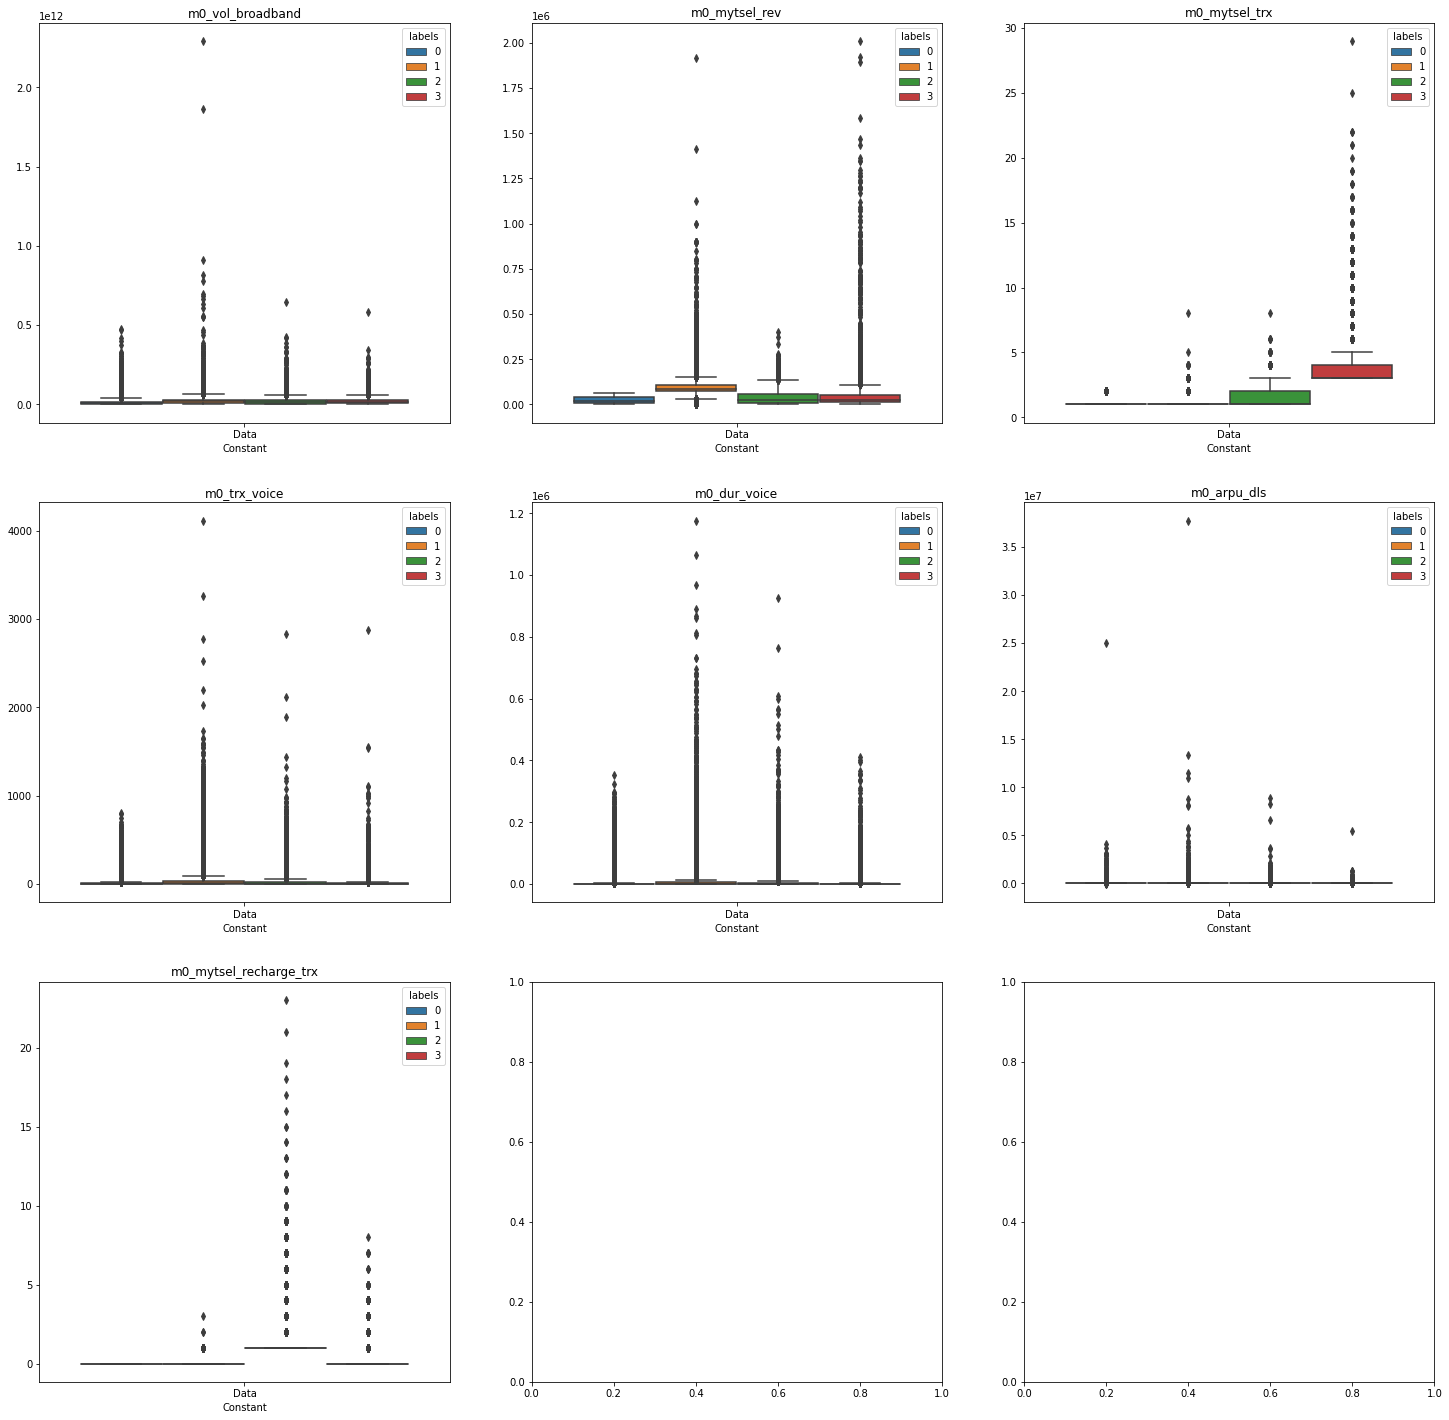

In [ ]:
start = timer()


f, axes = plt.subplots(3, 3, figsize=(25, 25), sharex=False) #create a 4x5 grid of empty figures where we will plot our feature plots. We will have a couple empty ones.
f.subplots_adjust(hspace=0.2, wspace=0.2) #Scooch em apart, give em some room
#In this for loop, I step through every column that I want to plot. This is a 4x5 grid, so I split this up by rows of 5 in the else if statements
for i in range(0,len(list(labeled_f_1))-2): #minus two because I don't want to plot labels or constant
    col = labeled_f_1.columns[i]
    if i < 3:
        ax = sns.boxplot(x=labeled_f_1['Constant'],y=labeled_f_1[col].values,hue=labeled_f_1['labels'],ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 3 and i<6:
        ax = sns.boxplot(x=labeled_f_1['Constant'],y=labeled_f_1[col].values,hue=labeled_f_1['labels'],ax=axes[1,(i-3)]) #so if i=6 it is row 1 column 1
        ax.set_title(col)
    elif i >= 6 and i<9:
        ax = sns.boxplot(x=labeled_f_1['Constant'],y=labeled_f_1[col].values,hue=labeled_f_1['labels'],ax=axes[2,(i-6)])
        ax.set_title(col)
    elif i >= 9:
        ax = sns.boxplot(x=labeled_f_1['Constant'],y=labeled_f_1[col].values,hue=labeled_f_1['labels'],ax=axes[3,(i-9)])
        ax.set_title(col)
        
end = timer()
print(end - start)

## Export Dataset

In [ ]:
basedata_merge.to_csv("/content/drive/MyDrive/Capstone_K5 - Case 2/usecase2 - result.csv")

# CLUSTERING PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss

from timeit import default_timer as timer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from pylab import rcParams

## Choose Features

In [ ]:
df = basedata_merge.loc[basedata_merge['preds'] == 1,['m0_arpu_dls','m0_rev_voice', 'm0_vol_broadband', 'm0_mytsel_rev', 'm0_mytsel_trx', 'm0_dur_voice', 'm0_mytsel_recharge_trx']].copy()
df

,m0_arpu_dls,m0_rev_voice,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_dur_voice,m0_mytsel_recharge_trx
0,8340.0,2078.0,3.282701e+10,2000.0,1,664.0,0
1,3485.0,0.0,3.612966e+09,73000.0,1,280.0,0
5,0.0,30291.0,1.029691e+10,39000.0,1,4897.0,2
9,0.0,0.0,2.168686e+10,5000.0,1,0.0,0
20,0.0,2795.0,1.450049e+10,115000.0,1,207.0,0
...,...,...,...,...,...,...,...
999993,152360.0,10017.0,6.270814e+09,2000.0,2,15006.0,2
999994,4496.0,37764.0,1.412293e+10,10.0,1,1352.0,0
999995,1385.0,0.0,3.668574e+10,8220.0,4,15084.0,0
999996,0.0,5500.0,1.006718e+09,5500.0,2,30.0,0


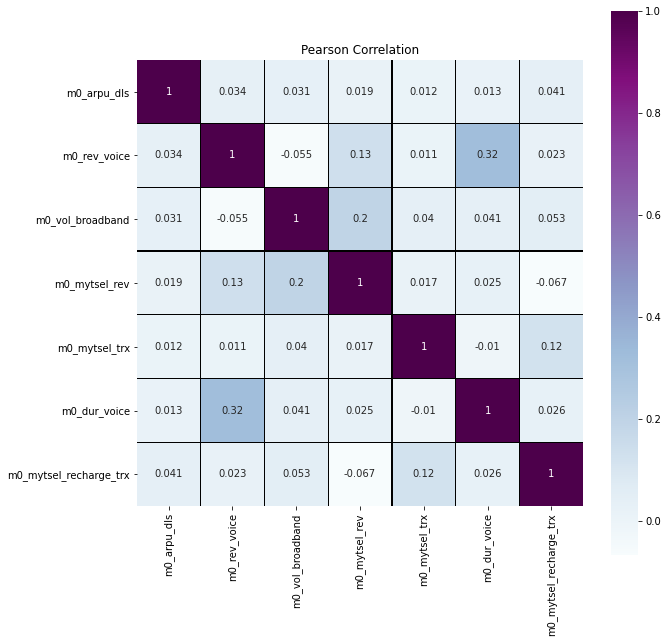

In [ ]:
#Setting Figure
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation')

#Membuat Visualisasi Correlation Pearson
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)

## Normal Clustering

### Elbow Method

#### Standarisasi Data

In [ ]:
df_std = preprocessing.MinMaxScaler().fit_transform(df)

In [ ]:
df_std = pd.DataFrame(df_std, index=df.index, columns=df.columns[:])
df_std

,m0_arpu_dls,m0_rev_voice,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_dur_voice,m0_mytsel_recharge_trx
0,0.001688,0.001081,0.014321,0.000995,0.000000,0.000565,0.000000
1,0.001559,0.000000,0.001576,0.036318,0.000000,0.000238,0.000000
5,0.001467,0.015760,0.004492,0.019403,0.000000,0.004165,0.086957
9,0.001467,0.000000,0.009461,0.002488,0.000000,0.000000,0.000000
20,0.001467,0.001454,0.006326,0.057214,0.000000,0.000176,0.000000
...,...,...,...,...,...,...,...
999993,0.005500,0.005212,0.002736,0.000995,0.035714,0.012763,0.086957
999994,0.001586,0.019648,0.006161,0.000005,0.000000,0.001150,0.000000
999995,0.001504,0.000000,0.016004,0.004090,0.107143,0.012830,0.000000
999996,0.001467,0.002862,0.000439,0.002736,0.035714,0.000026,0.000000


In [ ]:
scr=[]
for i in range(1,20):
  score=KMeans(n_clusters=i).fit(df_std).score(df_std)
  print(score)
  scr.append(score)

-987.6409904911806
-737.3784132721157
-611.4902238320918
-508.59073191634354
-448.9344449065957
-408.1512214082515
-367.73967199551106
-337.4910919726822
-305.45570981801586
-284.0689062281788
-266.63965054813156
-249.2615612893973
-240.3265881747289
-226.0210593932329
-213.90080335405216
-207.58387390922374
-196.73585714334655
-189.33271646187188
-180.71468685057457


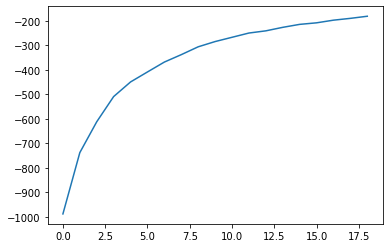

In [ ]:
plt.plot(scr)

### Silhouette

In [ ]:
X = df_std

In [ ]:
round = int(len(X) * 0.1)
round

40407

In [ ]:
indices = list(X.index.values)
type(indices)

list

In [ ]:
rand = np.random.choice(indices,
                             size = round, 
                             replace=False)
print((rand))

[138160 350415  46604 ... 967800 454923  12105]


In [ ]:
sample = X.loc[rand]

print(np.shape(sample))
sample.head(5)

(40407, 7)


,m0_arpu_dls,m0_rev_voice,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_dur_voice,m0_mytsel_recharge_trx
138160,0.002369,0.003069,0.007460,0.018408,0.0,0.000175,0.043478
350415,0.001467,0.000000,0.013358,0.013930,0.0,0.000000,0.000000
46604,0.001467,0.000000,0.000254,0.005970,0.0,0.000000,0.000000
677364,0.001467,0.000000,0.002323,0.000995,0.0,0.000000,0.000000
583952,0.001576,0.058089,0.000484,0.050995,0.0,0.051769,0.000000


In [ ]:
clean_sample = sample.reset_index()
clean_sample

,index,m0_arpu_dls,m0_rev_voice,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_dur_voice,m0_mytsel_recharge_trx
0,138160,0.002369,0.003069,0.007460,0.018408,0.000000,0.000175,0.043478
1,350415,0.001467,0.000000,0.013358,0.013930,0.000000,0.000000,0.000000
2,46604,0.001467,0.000000,0.000254,0.005970,0.000000,0.000000,0.000000
3,677364,0.001467,0.000000,0.002323,0.000995,0.000000,0.000000,0.000000
4,583952,0.001576,0.058089,0.000484,0.050995,0.000000,0.051769,0.000000
...,...,...,...,...,...,...,...,...
40402,317477,0.004449,0.082943,0.022767,0.089055,0.000000,0.026345,0.000000
40403,392592,0.001467,0.000000,0.013179,0.024876,0.000000,0.000000,0.000000
40404,967800,0.001467,0.000000,0.000589,0.004975,0.000000,0.006876,0.000000
40405,454923,0.001467,0.000545,0.002849,0.012811,0.035714,0.000422,0.043478


In [ ]:
sample_silh = clean_sample[['m0_arpu_dls', 'm0_rev_voice', 'm0_vol_broadband', 'm0_mytsel_rev', 'm0_dur_voice', 'm0_mytsel_recharge_trx']]
sample_silh

,m0_arpu_dls,m0_rev_voice,m0_vol_broadband,m0_mytsel_rev,m0_dur_voice,m0_mytsel_recharge_trx
0,0.002369,0.003069,0.007460,0.018408,0.000175,0.043478
1,0.001467,0.000000,0.013358,0.013930,0.000000,0.000000
2,0.001467,0.000000,0.000254,0.005970,0.000000,0.000000
3,0.001467,0.000000,0.002323,0.000995,0.000000,0.000000
4,0.001576,0.058089,0.000484,0.050995,0.051769,0.000000
...,...,...,...,...,...,...
40402,0.004449,0.082943,0.022767,0.089055,0.026345,0.000000
40403,0.001467,0.000000,0.013179,0.024876,0.000000,0.000000
40404,0.001467,0.000000,0.000589,0.004975,0.006876,0.000000
40405,0.001467,0.000545,0.002849,0.012811,0.000422,0.043478


In [ ]:
start = timer()
sil0 = []
kmax0 = 15
 
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax0+1):
  kmeans1 = KMeans(n_clusters = k).fit(sample_silh)
  labels_k = kmeans1.labels_
  sil0.append(silhouette_score(sample_silh, labels_k, metric = 'euclidean'))
 
sil0
end = timer()
 
print (end - start)

373.5317455979998


In [ ]:
sil01= pd.DataFrame(sil0)
sil01.index = sil01.index + 2
sil01

,0
2,0.381965
3,0.442742
4,0.459544
5,0.471327
6,0.456509
7,0.447219
8,0.455420
9,0.459029
10,0.343758
11,0.351994


### Clustering versi Normal

In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df_std.iloc[:,1:])

In [ ]:
#['label_v5'] = clusters
#basedata

## PCA

In [ ]:
X = df_std

pca = PCA(n_components=4, random_state=453)
X_r = pca.fit(X).transform(X)

print(str(pca.explained_variance_ratio_))

[0.40431848 0.23470291 0.18891071 0.09645061]


Karena 4 komponen sudah melebih 90% maka n_components = 4

In [ ]:
df_pca = df

### Standarisasi Data

In [ ]:
scaler = StandardScaler()
scaler.fit(df_pca)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(df_pca)


In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=453,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(scaled_data)
x_pca

array([[-0.56669103, -0.00944295, -0.13194629,  0.15000665],
       [-0.37019342, -0.27951679, -0.54708809,  0.07726037],
       [ 0.79801875,  0.03137551,  2.49037292, -0.1532139 ],
       ...,
       [ 0.20811481,  1.1533418 ,  1.60537366, -1.0277317 ],
       [-0.69914941, -0.66459628,  0.7044088 , -0.20986022],
       [-0.39554704, -0.16221826,  1.42796479,  0.42111011]])

In [ ]:
df_xpca = DataFrame ({'Component1' : x_pca[:,0],
                      'Component2' : x_pca[:,1],
                      'Component3' : x_pca[:,2],
                      'Component4' : x_pca[:,3]})
df_xpca

,Component1,Component2,Component3,Component4
0,-0.566691,-0.009443,-0.131946,0.150007
1,-0.370193,-0.279517,-0.547088,0.077260
2,0.798019,0.031376,2.490373,-0.153214
3,-0.746831,-0.319472,-0.081034,0.100212
4,0.144351,0.423384,-1.038393,-0.041257
...,...,...,...,...
404066,0.493203,0.292464,3.712282,0.942529
404067,0.311676,-1.131678,0.139831,0.106398
404068,0.208115,1.153342,1.605374,-1.027732
404069,-0.699149,-0.664596,0.704409,-0.209860


### Elbow Method

In [ ]:
scr=[]
for i in range(1,20):
  score=KMeans(n_clusters=i).fit(df_xpca).score(df_xpca)
  print(score)
  scr.append(score)

-1892883.1509725968
-1585052.8920909266
-1316789.8378136156
-1068577.3711795546
-890969.8146590515
-800636.228518804
-721496.1065562154
-637360.3211774753
-565882.9672177585
-516732.77097774815
-486947.5288621218
-446604.182589082
-423638.21705301735
-395261.5627032487
-375004.84379495605
-354318.3467997402
-333421.7137884482
-320344.85564416065
-307542.16067394445


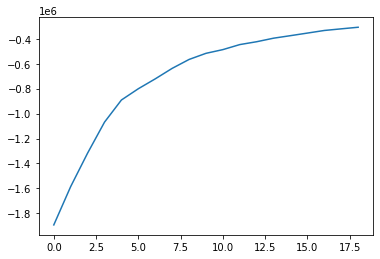

In [ ]:
plt.plot(scr)

### Silhouette

In [ ]:
df_xpca

,Component1,Component2,Component3,Component4
0,-0.566691,-0.009443,-0.131946,0.150007
1,-0.370193,-0.279517,-0.547088,0.077260
2,0.798019,0.031376,2.490373,-0.153214
3,-0.746831,-0.319472,-0.081034,0.100212
4,0.144351,0.423384,-1.038393,-0.041257
...,...,...,...,...
404066,0.493203,0.292464,3.712282,0.942529
404067,0.311676,-1.131678,0.139831,0.106398
404068,0.208115,1.153342,1.605374,-1.027732
404069,-0.699149,-0.664596,0.704409,-0.209860


In [ ]:
X = df_xpca

In [ ]:
round = int(len(X) * 0.1)
round

40407

In [ ]:
indices = list(X.index.values)
type(indices)

list

In [ ]:
rand = np.random.choice(indices,
                             size = round, 
                             replace=False)
print((rand))

[327605 400500   9041 ...  52629 387397  11303]


In [ ]:
sample = X.loc[rand]

print(np.shape(sample))
sample.head(5)

(40407, 4)


,Component1,Component2,Component3,Component4
327605,0.784076,0.653735,-1.336354,-0.114872
400500,-0.539811,0.008046,-0.307753,0.061814
9041,0.187508,0.657286,-1.016779,-0.050241
27581,0.437088,1.233721,-1.138846,-0.106484
103332,0.238096,0.068012,-0.856281,-0.029111


In [ ]:
clean_sample = sample.reset_index()
clean_sample

,index,Component1,Component2,Component3,Component4
0,327605,0.784076,0.653735,-1.336354,-0.114872
1,400500,-0.539811,0.008046,-0.307753,0.061814
2,9041,0.187508,0.657286,-1.016779,-0.050241
3,27581,0.437088,1.233721,-1.138846,-0.106484
4,103332,0.238096,0.068012,-0.856281,-0.029111
...,...,...,...,...,...
40402,161608,0.763622,0.554435,-1.061522,-0.084663
40403,361477,-0.997616,-1.073791,0.162250,0.156082
40404,52629,-0.803448,-0.505105,1.471680,0.062647
40405,387397,-0.799382,-0.793549,0.089991,0.136288


In [ ]:
sample_silh = clean_sample[['Component1', 'Component2', 'Component3','Component4']]
sample_silh

,Component1,Component2,Component3,Component4
0,0.784076,0.653735,-1.336354,-0.114872
1,-0.539811,0.008046,-0.307753,0.061814
2,0.187508,0.657286,-1.016779,-0.050241
3,0.437088,1.233721,-1.138846,-0.106484
4,0.238096,0.068012,-0.856281,-0.029111
...,...,...,...,...
40402,0.763622,0.554435,-1.061522,-0.084663
40403,-0.997616,-1.073791,0.162250,0.156082
40404,-0.803448,-0.505105,1.471680,0.062647
40405,-0.799382,-0.793549,0.089991,0.136288


In [ ]:
start = timer()
sil0 = []
kmax0 = 15
 
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax0+1):
  kmeans1 = KMeans(n_clusters = k).fit(sample_silh)
  labels_k = kmeans1.labels_
  sil0.append(silhouette_score(sample_silh, labels_k, metric = 'euclidean'))
 
sil0
end = timer()
 
print (end - start)

380.2838932310001


In [ ]:
sil01= pd.DataFrame(sil0)
sil01.index = sil01.index + 2
sil01

,0
2,0.600357
3,0.530717
4,0.394003
5,0.393213
6,0.402193
7,0.403576
8,0.376640
9,0.376830
10,0.367103
11,0.371011


Hasil Elbow menunjukkan hasil cluster Optimal disekitar 3-4,
Hasil dari Silhouette memverifikasi untuk menggunakan 3 cluster

### Clustering versi PCA

In [ ]:
km = KMeans(n_clusters=3, random_state=453).fit(df_xpca)
clusters = km.fit_predict(df_xpca.iloc[:,1:])

In [ ]:
df['label_v6'] = clusters
df

,m0_arpu_dls,m0_rev_voice,m0_vol_broadband,m0_mytsel_rev,m0_mytsel_trx,m0_dur_voice,m0_mytsel_recharge_trx,label_v6
0,8340.0,2078.0,3.282701e+10,2000.0,1,664.0,0,0
1,3485.0,0.0,3.612966e+09,73000.0,1,280.0,0,0
5,0.0,30291.0,1.029691e+10,39000.0,1,4897.0,2,2
9,0.0,0.0,2.168686e+10,5000.0,1,0.0,0,0
20,0.0,2795.0,1.450049e+10,115000.0,1,207.0,0,1
...,...,...,...,...,...,...,...,...
999993,152360.0,10017.0,6.270814e+09,2000.0,2,15006.0,2,2
999994,4496.0,37764.0,1.412293e+10,10.0,1,1352.0,0,0
999995,1385.0,0.0,3.668574e+10,8220.0,4,15084.0,0,2
999996,0.0,5500.0,1.006718e+09,5500.0,2,30.0,0,0


## Export Dataset

In [ ]:
export = df[['label_v6']]
export

,label_v6
0,0
1,0
5,2
9,0
20,1
...,...
999993,2
999994,0
999995,2
999996,0


In [ ]:
count_clus_f = export.groupby(by =['label_v6']).size().reset_index(name='counts')
count_clus_f

,label_v6,counts
0,0,240532
1,1,135336
2,2,28203


In [ ]:
export.to_csv("/content/drive/MyDrive/Capstone_K5 - Case 2/usecase2 - result(cluster).csv")

In [ ]:
import plotly.express as px

df_std['label_v6'] = clusters

polar=df_std.groupby("label_v6").mean().reset_index()
polar=pd.melt(polar,id_vars=["label_v6"])
fig_f = px.line_polar(polar, r="value", theta="variable", color="label_v6", line_close=True,height=600,width=700)
fig_f.show()